In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df_test = pd.read_csv("/content/drive/MyDrive/Event 4.CSV", skiprows=[0,1,2,4])

df_test

Time   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A  \
0             0                          -0.004329   
1           208                          -0.004329   
2           417                          -2.949805   
3           625                         -59.594590   
4           833                        -121.711400   
...         ...                                ...   
96001  20000080                        -107.363700   
96002  20000289                        -102.389100   
96003  20000497                         -96.799230   
96004  20000705                         -90.581010   
96005  20000914                         -83.812960   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C  \
0                              -0.001515                          -0.001623   
1                              -0.001515                          -0.001623   
2                               0.129254                           2.902578   
3                               0.953098                          60.338350   
4                              -8.763029                         132.230300   
...                                  ...                                ...   
96001                           2.914632                         104.303300   
96002                          -6.670727                         108.918900   
96003                         -16.229930                         112.860300   
96004                         -25.684520                         116.101600   
96005                         -34.982190                         118.629800   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N   V_BUS20KV1_AN   V_BUS20KV1_BN  \
0                              -0.000095         0.04508        0.067282   
1                              -0.000095         0.04508        0.067282   
2                              -0.086547       185.03150        9.019005   
3                              -1.701627      4822.05300      238.183100   
4                              -1.750747     11365.89000     1068.903000   
...                                  ...             ...             ...   
96001                           0.141372     10036.55000     -246.284100   
96002                           0.151196      9573.86300      647.097800   
96003                           0.159055      9051.57400     1536.183000   
96004                           0.166915      8472.77400     2416.316000   
96005                           0.174774      7841.43700     3281.769000   

        V_BUS20KV1_CN   C_WE919_WE910_1_WE910_A   C_WE919_WE910_1_WE910_B  \
0           -0.244665                 -0.000550                  0.000310   
1           -0.244665                 -0.000550                  0.000310   
2         -191.888600                 -0.147661                  0.077044   
3        -5049.003000                 -4.277356                  2.171564   
4       -12438.870000                -13.147550                  6.146612   
...               ...                       ...                       ...   
96001    -9789.851000                -31.042110                 23.562030   
96002   -10221.420000                -31.617610                 21.703120   
96003   -10589.430000                -31.997740                 19.709110   
96004   -10891.430000                -32.181340                 17.592980   
96005   -11126.430000                -32.167220                 15.368770   

       ...   V_2DBU17_CN   C_3DBX3_2DBU17_1_2DBU17_A  \
0      ...     -0.023287                    0.000081   
1      ...     -0.023287                    0.000081   
2      ...    -14.103820                   -0.010343   
3      ...  -1571.959000                   -0.697677   
4      ...  -7043.420000                   -2.322523   
...    ...           ...                         ...   
96001  ...  -7589.041000                  -13.282080   
96002  ...  -8081.860000                  -13.168070   
96003  ...  -8524.224000                  -12.973920   
96004  ...  -89

In [56]:
# remove first 0.25 seconds to allow system to stabilise before using data
data = df_test[df_test['Time'] > 0.25e6].iloc[:, 1:]
data

C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B  \
1201                          -104.45750                          -3.022276   
1202                           -99.07707                         -12.646870   
1203                           -93.08139                         -22.179920   
1204                           -86.50970                         -31.582200   
1205                           -79.41438                         -40.788330   
...                                  ...                                ...   
96001                         -107.36370                           2.914632   
96002                         -102.38910                          -6.670727   
96003                          -96.79923                         -16.229930   
96004                          -90.58101                         -25.684520   
96005                          -83.81296                         -34.982190   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N  \
1201                            107.3242                           0.145302   
1202                            111.5508                           0.162985   
1203                            115.0774                           0.180668   
1204                            117.9038                           0.196387   
1205                            119.9912                           0.212105   
...                                  ...                                ...   
96001                           104.3033                           0.141372   
96002                           108.9189                           0.151196   
96003                           112.8603                           0.159055   
96004                           116.1016                           0.166915   
96005                           118.6298                           0.174774   

        V_BUS20KV1_AN   V_BUS20KV1_BN   V_BUS20KV1_CN  \
1201         9766.355        306.5743      -10073.130   
1202         9264.375       1202.4630      -10467.260   
1203         8705.442       2090.8320      -10796.350   
1204         8092.647       2965.5940      -11058.440   
1205         7430.405       3821.7370      -11252.550   
...               ...             ...             ...   
96001       10036.550       -246.2841       -9789.851   
96002        9573.863        647.0978      -10221.420   
96003        9051.574       1536.1830      -10589.430   
96004        8472.774       2416.3160      -10891.430   
96005        7841.437       3281.7690      -11126.430   

        C_WE919_WE910_1_WE910_A   C_WE919_WE910_1_WE910_B  \
1201                  -30.13120                  21.10978   
1202                  -30.55253                  19.23790   
1203                  -30.78555                  17.24713   
1204                  -30.82910                  15.14937   
1205                  -30.68199                  12.95866   
...                         ...                       ...   
96001                 -31.04211                  23.56203   
96002                 -31.61761                  21.70312   
96003                 -31.99774                  19.70911   
96004                 -32.18134                  17.59298   
96005                 -32.16722                  15.36877   

        C_WE919_WE910_1_WE910_C  ...   V_2DBU17_CN  \
1201                   9.022247  ...     -8232.835   
1202                  11.314330  ...     -8685.367   
1203                  13.538670  ...     -9083.925   
1204                  15.679100  ...     -9426.551   
1205                  17.723470  ...     -9710.900   
...                         ...  ...           ...   
96001                  7.479362  ...     -7589.041   
96002                  9.914006  ...     -8081.860   
96003                 12.289000  ...     -8524.224   
96004                 14.588160  ...     -8913.785   
96005                 16.798350  ...     -9248.198   

        C_3DBX3_2DBU17_1_2DBU17_A   C_3DBX3

In [57]:
cols = data.columns

#one period is 70 timesteps

#adjacency list mapping out node:[neighbors]
adj_list = {1: [29, 65],
 2: [30, 66],
 3: [31, 67],
 5: [12, 26, 19, 62],
 6: [13, 27, 20, 63],
 7: [14, 28, 21, 64],
 8: [15, 22],
 9: [16, 23],
 10: [17, 24],
 12: [5, 26, 33, 19],
 13: [6, 27, 34,20],
 14: [7, 28, 35,21],
 15: [8, 29, 52],
 16: [9, 53, 30],
 17: [10, 54, 31],
 19: [26, 5, 33, 12],
 20: [27, 34, 6,13],
 21: [28, 35, 7,14],
 22: [8, 36, 40, 29],
 23: [9, 37, 41, 30],
 24: [10, 38, 42, 31],
 26: [12, 33, 5, 19],
 27: [13, 20, 34, 6],
 28: [14, 21, 35, 7],
 29: [1, 65, 15, 48, 22],
 30: [2, 66, 49, 16, 23],
 31: [3, 67, 50, 17, 24],
 33: [56, 19, 26, 12],
 34: [57, 13, 27, 20],
 35: [58, 14, 28, 21],
 36: [22, 40],
 37: [23, 41],
 38: [24, 42],
 40: [36, 48,22],
 41: [37, 49, 23],
 42: [38, 50, 24],
 44: [52, 59],
 45: [53, 60],
 46: [54, 61],
 48: [40, 52, 29],
 49: [53, 30, 41],
 50: [31, 42, 54],
 52: [44, 59, 48, 15],
 53: [45, 60, 49, 16],
 54: [17, 50, 46, 61],
 56: [33, 74, 68],
 57: [34, 75, 69],
 58: [35, 76, 70],
 59: [71, 77, 44, 52],
 60: [45, 78, 72, 53],
 61: [46, 79, 73, 54],
 62: [5, 86, 80],
 63: [6, 87, 81],
 64: [7, 88, 82],
 65: [29, 1, 89, 83],
 66: [2, 30, 90, 84],
 67: [85, 91, 3, 31],
 68: [56, 74],
 69: [57, 75],
 70: [58, 76],
 71: [59, 77],
 72: [60, 78],
 73: [79, 61],
 74: [56, 68],
 75: [57, 69],
 76: [58, 70],
 77: [59, 71],
 78: [60, 72],
 79: [61, 73],
 80: [62, 86],
 81: [63, 87],
 82: [64, 88],
 83: [89, 65],
 84: [90, 66],
 85: [91, 67],
 86: [62, 80],
 87: [63, 81],
 88: [64, 82],
 89: [65, 83],
 90: [66, 84],
 91: [85, 67]}

# index_mapping = [(1, 'C_CTWE5_A'), (2, 'C_CTWE5_B'), (3, 'C_CTWE5_C'), (4, 'C_CTWE5_N'), (5, 'V_PTWE4_AN'), (6, 'V_ PTWE4_BN'), (7, 'V_ PTWE4_CN'), (8, 'C_CTWE1_A'), (9, 'C_CTWE1_B'), (10, 'C_CTWE1_C'), (11, 'C_CTWE1_N'), (12, 'V_PTWE1_AN'), (13, 'V_ PTWE1_BN'), (14, 'V_ PTWE1_CN'), (15, 'C_CTWE9_A'), (16, 'C_CTWE9_B'), (17, 'C_CTWE9_C'), (18, 'C_CTWE9_N'), (19, 'V_PTWE3_AN'), (20, 'V_ PTWE3_BN'), (21, 'V_ PTWE3_CN'), (22, 'C_CTWE3_A'), (23, 'C_ CTWE3_B'), (24, 'C_ CTWE3_C'), (25, 'C_ CTWE3_N'), (26, 'V_PTWE2_AN'), (27, 'V_ PTWE2_BN'), (28, 'V_ PTWE2_CN'), (29, 'C_CTWE7_A'), (30, 'C_CTWE7_B'), (31, 'C_CTWE7_C'), (32, 'C_CTWE7_N'), (33, 'V_PTWE5_AN'), (34, 'V_ PTWE5_BN'), (35, 'V_ PTWE5_CN'), (36, 'C_CTWE2_A'), (37, 'C_ CTWE2_B'), (38, 'C_ CTWE2_C'), (39, 'C_ CTWE2_N'), (40, 'C_CTWE4_A'), (41, 'C_ CTWE4_B'), (42, 'C_ CTWE4_C'), (43, 'C_ CTWE4_N'), (44, 'C_CTWE6_A'), (45, 'C_ CTWE6_B'), (46, 'C_ CTWE6_C'), (47, 'C_ CTWE6_N'), (48, 'C_CTWE10_A'), (49, 'C_ CTWE10_B'), (50, 'C_ CTWE10_C'), (51, 'C_ CTWE10_N'), (52, 'C_CTWE8_A'), (53, 'C_CTWE8_B'), (54, 'C_CTWE8_C'), (55, 'C_CTWE8_N'), (56, 'V_PT_DIST1_AN'), (57, 'V_PT_DIST1_BN'), (58, 'V_PT_DIST1_CN'), (59, 'C_ CT_ DIST1_A'), (60, 'C_ CT_ DIST1_B'), (61, ' C_ CT_ DIST1_C'), (62, 'V_PT_DIST2_AN'), (63, 'V_PT_DIST2_BN'), (64, 'V_PT_DIST2_CN'), (65, 'C_ CT_ DIST2_A'), (66, 'C_ CT_ DIST2_B'), (67, ' C_ CT_ DIST2_C'), (68, 'V_PT_FDR3_AN'), (69, 'V_PT_FDR3_BN'), (70, 'V_PT_FDR3_CN'), (71, 'C_CT_FDR3_A'), (72, 'C_CT_FDR3_B'), (73, 'C_CT_FDR3_C'), (74, 'V_PT_FDR1_AN'), (75, 'V_PT_FDR1_BN'), (76, 'V_PT_FDR1_CN'), (77, 'C_CT_FDR1_A'), (78, 'C_CT_FDR1_B'), (79, 'C_CT_FDR1_C'), (80, 'V_PT_FDR32_AN'), (81, 'V_PT_FDR32_BN'), (82, 'V_PT_FDR32_CN'), (83, 'C_CT_FDR32_A'), (84, 'C_CT_FDR32_B'), (85, 'C_CT_FDR32_C'), (86, 'V_PT_FDR12_AN'), (87, 'V_PT_FDR12_BN'), (88, 'V_PT_FDR12_CN'), (89, 'C_CT_FDR12_A'), (90, 'C_CT_FDR12_B'), (91, 'C_CT_FDR12_C')]

emptyr = [4,11,18,25,32,39,43,47,51,55] #nodes without connections to anything

#dictionary containing attack points with format number:(start time, end time, type, name)
attack_dict = { 52:(1.10,2.10,'CT','C_CTWE8_A'),   53:(1.10,2.10,'CT','C_CTWE8_B'), 54:(1.10,2.10,'CT','C_CTWE8_C'), 55:(1.10, 2.10,'CT','C_CTWE8_N'),
#                56:(2.30,3.00,'PT','V_PT_DIST1_AN'), 57:(2.30,3.00,'PT','V_PT_DIST1_BN'), 58:(2.30,3.00,'PT','V_PT_DIST1_CN'),
               5:(5.00,5.90,'Vphase','V_PTWE4_AN'), 66:(6.60,7.80,'Cphase','C_CT_DIST2_B'), 68:(9.00,10.10,'GPS','V_PT_FDR3_AN'), 69:(9.00,10.10,'GPS','V_PT_FDR3_BN'), 70:(9.00,10.10,'GPS','V_PT_FDR3_CN'), 71:(9.00,10.10,'GPS','C_CT_FDR3_A'), 72:(9.00,10.10,'GPS','C_CT_FDR3_B'), 73:(9.00,10.10,'GPS','C_CT_FDR3_C'), 36:(10.50,11.70,'GPS','C_CTWE2_A'), 37:(10.50,11.70,'GPS','C_CTWE2_B'), 38:(10.50,11.70,'GPS','C_CTWE2_C'),39:(10.50,11.70,'GPS','C_CTWE2_N'), 77:(16.20, 17.00, 'CT', 'C_CT_FDR1_A'), 78:(16.20, 17.00, 'CT', 'C_CT_FDR1_B'), 79:(16.20, 17.00, 'CT', 'C_CT_FDR1_C'), 86:(17.40, 18.30, 'PT','V_PT_FDR12_AN'), 87:(17.40, 18.30, 'PT','V_PT_FDR12_BN'), 88:(17.40, 18.30, 'PT','V_PT_FDR12_CN')}

#dictionary containing the only attack without a compromised unit
attack_wo_comp_dict = {'Load_decrease':(10.20, 10.20, 'Bus_3DB211', 'all')}

#dictionary contatining faults labeled    type:(start time, end time, location, effects?)
fault_dict = {'Downed_conductor':[3.25,3.50,'Bus_DBU3_A','all'], 'LG':[8.50,8.57,'Bus_FDR11LOAD_A','none'], 'LL':[12.00,12.08,'Bus_3DB12','none']}

#dictionary containing normal events labeled    time:(type, power, location)
normal_dict = { 6.10:('L+','1500kw+10kvar', 'Bus_3DB211'), 8.00:('L+','4500kw+1000kvar','Bus_TRAIN1'), 10.20:('L-','1500kw+10kvar', 'Bus_3DB211'), 13.50:('L+','6500kw+2000kvar', 'Bus_FDR12LOAD'), 14.00:('L+','1500kw+10kvar','Bus_2DB112'), 14.40:('L-','4500kw+1000kvar', 'Bus_TRAIN1'), 18.80:('L-','6500kw+2000kvar','FDR12LOAD'), 19.50:('L-','1500kw+10kvar','Bus_2DB112'), 19.80:('L+','1500kw+10kvar','Bus_3DB211')}

all_attack_times = set()
for k, values in attack_dict.items():
    all_attack_times.add((values[0], values[1]))

print(all_attack_times)

# delete low correlations

#for i in [36, 37, 38]:
    #del adj_list[i][-1]


def correlation_pair(dataframe, var1_index, var2_index, window):

    return dataframe.iloc[:, var1_index].rolling(window).corr(dataframe.iloc[:, var2_index])[window-1:]


def correlation_pair_plot(dataframe, var1_index, var2_index, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):

    corrs = correlation_pair(dataframe, var1_index, var2_index, window)

    plt.title(f"Sample Correlation against Time, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
    plt.plot(corrs)

    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)

    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')


    plt.show()

    if freq:
        plt.title(f"Sample Correlation Frequency, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
        plt.hist(corrs, bins=500)
        plt.show()

    return corrs

def correlation_multi(dataframe, var1_index, var2_indices, window):

    corrs = []
    for var2_index in var2_indices:
        corrs.append(correlation_pair(dataframe, var1_index, var2_index, window))

    return np.prod(corrs, axis=0)


def correlation_multi_plot(dataframe, var1_index, var2_indices, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):

    corrs = correlation_multi(dataframe, var1_index, var2_indices, window)

    plt.title(f"Sample Correlation against Time, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
    plt.plot(corrs)

    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')

    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)

    plt.show()

    if freq:
        plt.title(f"Sample Correlation Frequency, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
        plt.hist(corrs, bins=500)
        plt.show()

    return corrs


def covariance_pair(dataframe, var1_index, var2_index, window):

    return dataframe.iloc[:, var1_index].rolling(window).cov(dataframe.iloc[:, var2_index])[window-1:]


def covariance_pair_plot(dataframe, var1_index, var2_index, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):

    covs = covariance_pair(dataframe, var1_index, var2_index, window)

    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
    plt.plot(covs)

    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)

    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')



    plt.show()

    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index], cols[var2_index]}")
        plt.hist(covs, bins=500)
        plt.show()

    return covs


def covariance_multi(dataframe, var1_index, var2_indices, window):

    covs = []
    for var2_index in var2_indices:
        covs.append(covariance_pair(dataframe, var1_index, var2_index, window))

    return np.prod(covs, axis=0)

def covariance_multi_plot(dataframe, var1_index, var2_indices, window, freq=True,
                     attack_indices=[], other_attack_indices=[]):

    covs = covariance_multi(dataframe, var1_index, var2_indices, window)

    plt.title(f"Sample Covariance against Time, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")

    plt.plot(covs)


    for start, end in other_attack_indices:
        plt.axvline(start, color='pink', alpha=0.75)
        plt.axvline(end, color='pink', alpha=0.75)

    for start, end in attack_indices:
        plt.axvline(start, color='red')
        plt.axvline(end, color='red')

    plt.show()

    if freq:
        plt.title(f"Sample Covariance Frequency, Window Length {window}, Variables: {cols[var1_index]} with " + \
              f"{[cols[var2_index] for var2_index in var2_indices]}")
        plt.hist(covs, bins=500)
        plt.show()

    return covs


def get_labels(y, window):
    '''
    get cumlulative statistic for presence of anomaly
    if window has anomaly, label the whole window as anomalous
    y: array of presence of anomalies across time
    window: window size of statistic + roll sum window
    '''

    return (np.lib.stride_tricks.sliding_window_view(y, window) == 1).any(axis=0).squeeze()

def steps(x):
    return x.iloc[-1] - x.iloc[0]

def roll_sum(stat, window, axis=1):
    '''
    we calculate the rolling sum of the differences within a window

    Suppose we have something that is very different the rolling sum will change.

    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    axis: axis to perform difference on (time axis usually along axis 1)
    '''

    # calculate difference btw each time step
    diff = np.diff(stat, n=1)

    # calculate rolling sum
    csum = np.cumsum(diff, dtype=float)
    xsum = csum[window:] - csum[:-window]
    return np.abs(xsum)


def get_empirical_diff_threshold(stat, window, fn, axis=1, quantile=0.95, sensor_names=[]):
    '''
    we calculate the rolling sum of the differences within a window

    stat: array of statistical property (eg. covariance) from training
    window: window for differences (different from window for calculating statistical property)
    quantile: confidence level
    axis: axis to perform difference on
        (time axis usually along axis 1 for 2D array. for ID array, axis=-1)
    sensor_names: list of sensor names. if empty, don't plot
    '''

    # calculate difference btw each time step
    test_stat = fn(stat, window, axis=axis)

    # plot the histogram of the frequency of rolling sum (or whatever function)
    # --> can be commented out
    if len(sensor_names) > 0:
        fig, ax = plt.subplots(len(sensor_names), 1)
        #test_statdf = pd.DataFrame(test_stat)
        #test_statdf.plot.kde()
        if len(sensor_names) == 1:
            ax.hist(test_stat, bins=500)
            ax.set_title(f"Rolling Sum of Difference Frequency of {cols[sensor_names[0]]}{sensor_names[0]}")
        else:
            for i, n in enumerate(sensor_names):
                ax[0].hist(test_stat, bins=500)
                ax[0].set_title(f"Rolling Sum of Difference Frequency of {s}")
        plt.show()
    #########################################################

    # return the threshold
    # may need to make this 2-sided (for negative and positive)
    return np.quantile(test_stat, quantile)

def get_threshold(stat, window, fn, axis=1, quantile=0.95):


    test_stat = fn(stat, window, axis=axis)

    return np.quantile(test_stat, quantile)

# For Test Data

def detect(stat, window, threshold, multi=False):
    '''
    we use the critical regions (ie. thresholds) obtained from the previous function
    to detect local violations (anomaly detection on the local level)
    stat: array of statistical property from test data
    '''
    violation = (roll_sum(stat, window) > threshold)

    if not multi:
        violation = (violation > 0).any(axis=0).squeeze()

    return violation


def get_metrics(y_true, y_pred):
    '''
    get detection metrics
    expand this to obtain EDD and ARL
    '''

    labels = get_labels(y_true)

    # can get more metrics here
    precision, recall, f1, support = precision_recall_fscore_support(labels, y_pred)

    return precision, recall, f1


def evaluate(y_true, stat, window, threshold, multi=False):

    violation = detect(stat, window, threshold, multi=multi)
    metrics = get_metrics(y_true, violation)

    return metrics

def get_scores(y_true, y_pred):

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

{(9.0, 10.1), (17.4, 18.3), (6.6, 7.8), (5.0, 5.9), (10.5, 11.7), (16.2, 17.0), (1.1, 2.1)}


In [58]:
all_attack_indices = [(4080, 8879),(22800, 27119), (30480, 36239),(42000, 47279),(49200, 54959),(76560, 80399),(82320, 86639)]

***********************************************************************************************
Attacked Sensor: C_CTWE8_A number:52, Time Attacked: 1.1s to 2.1s
Covariance:


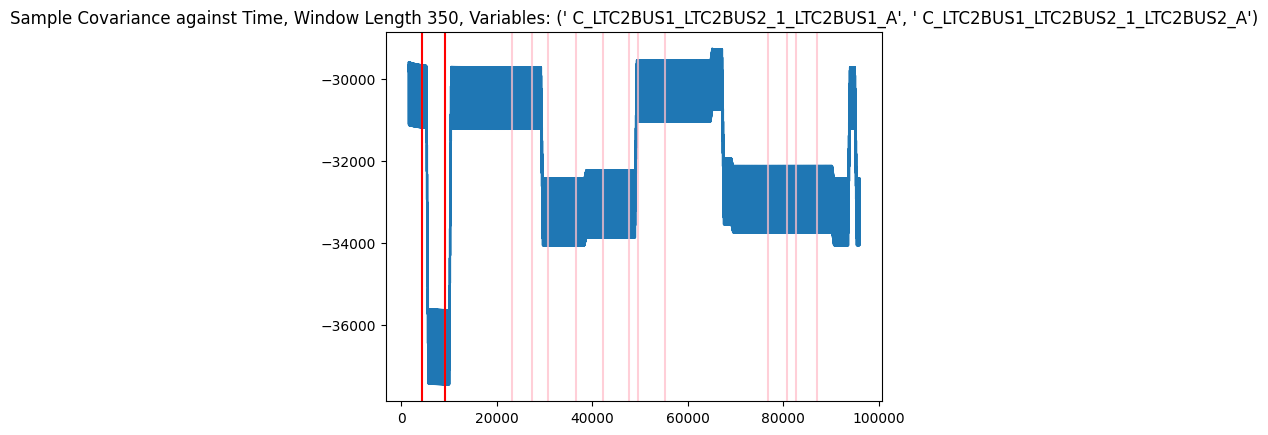

Correlation:


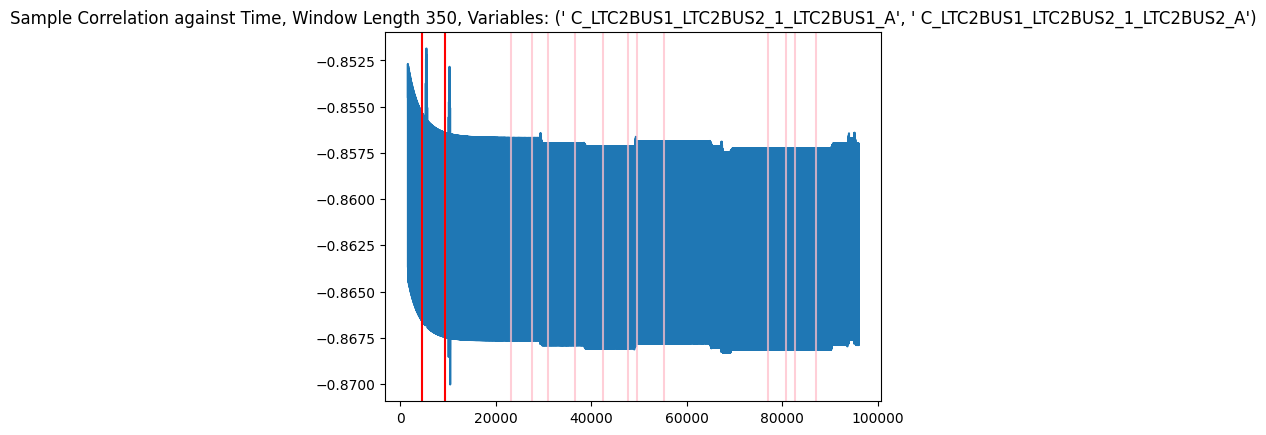

Covariance:


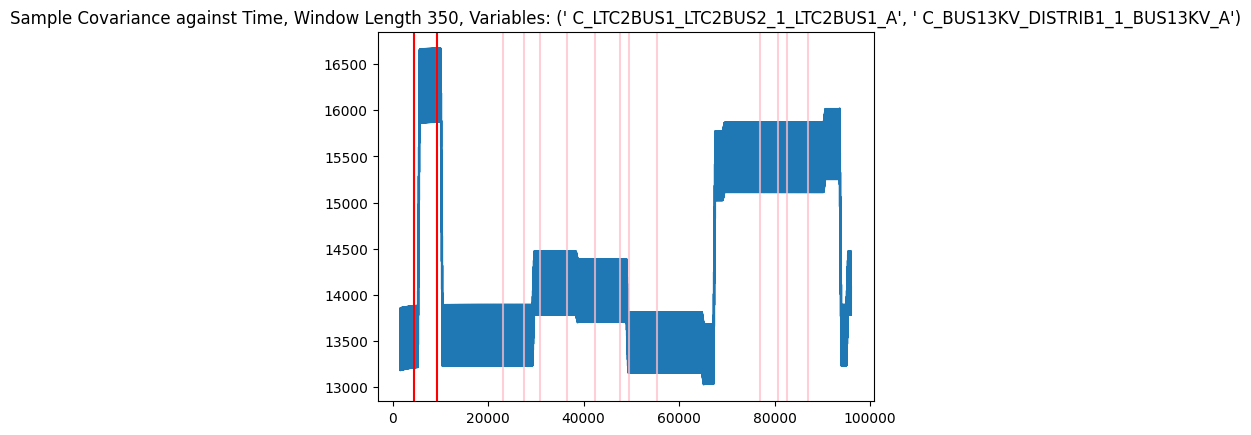

Correlation:


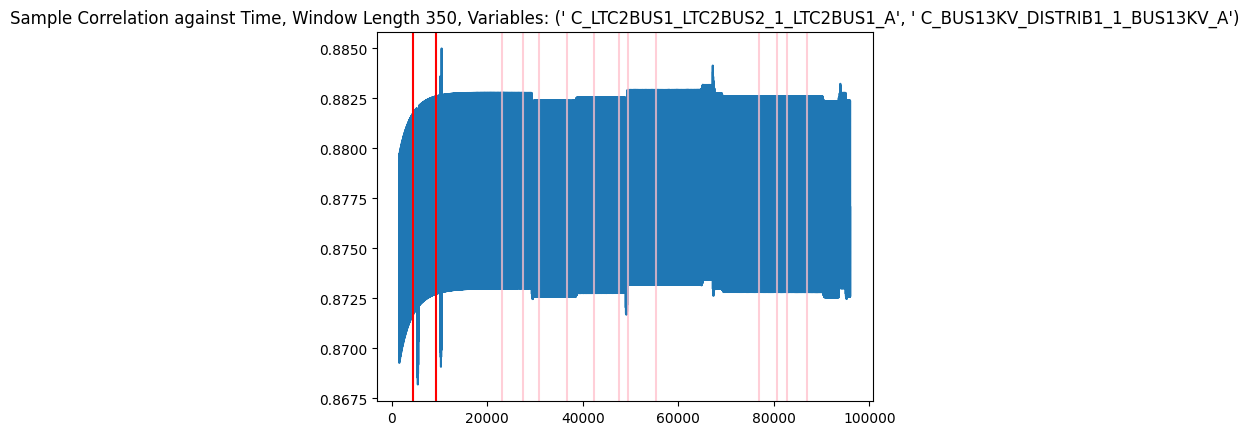

Covariance:


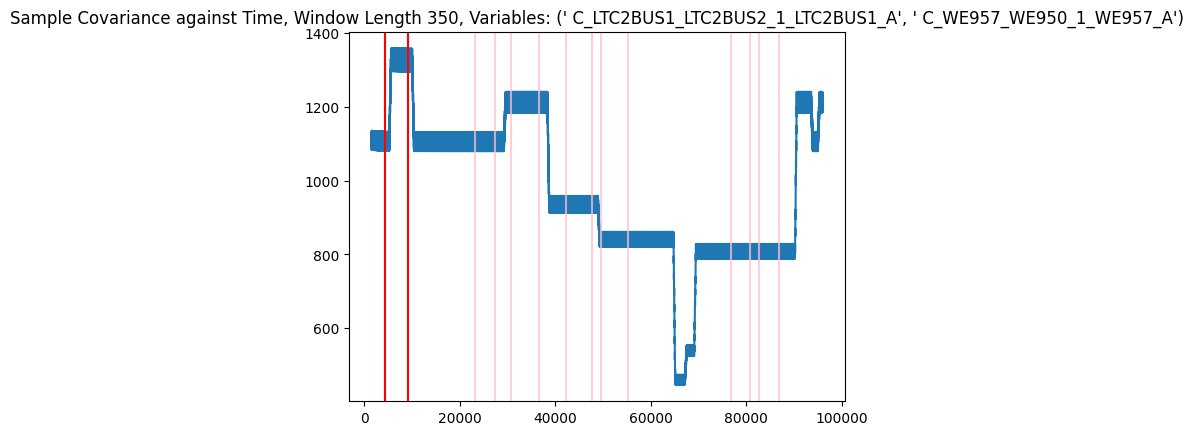

Correlation:


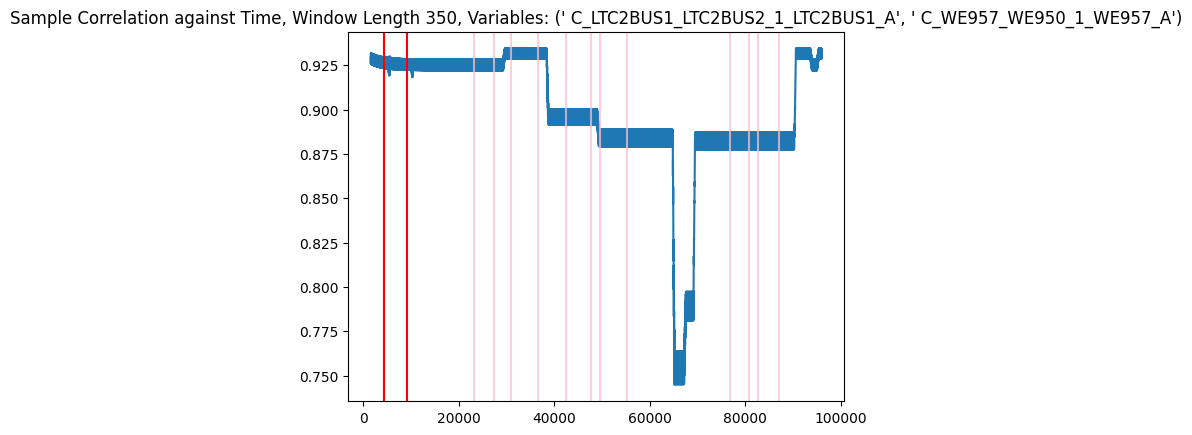

Covariance:


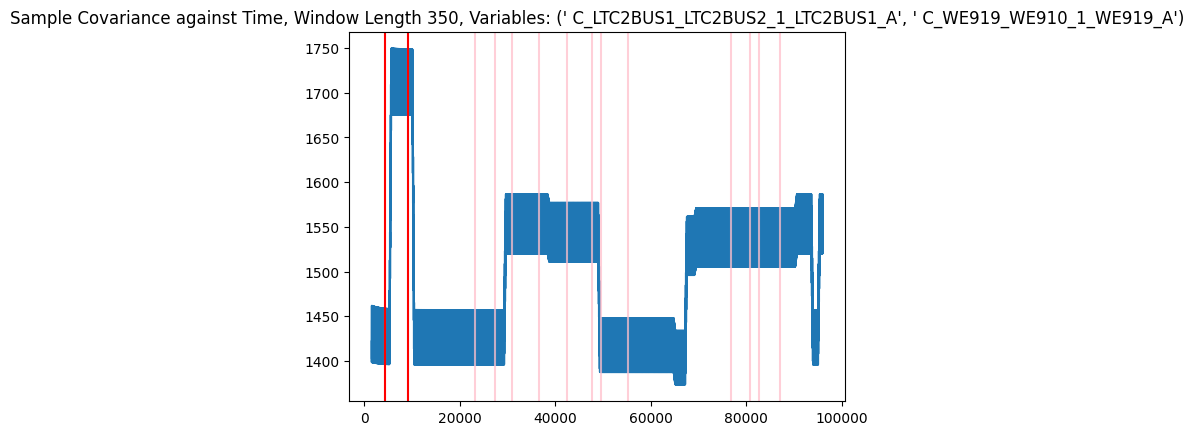

Correlation:


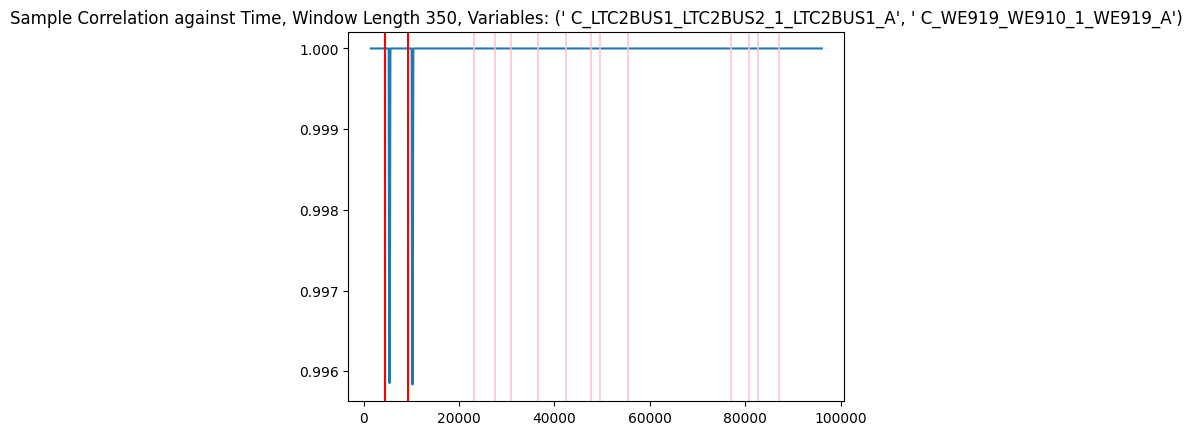

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CTWE8_B number:53, Time Attacked: 1.1s to 2.1s
Covariance:


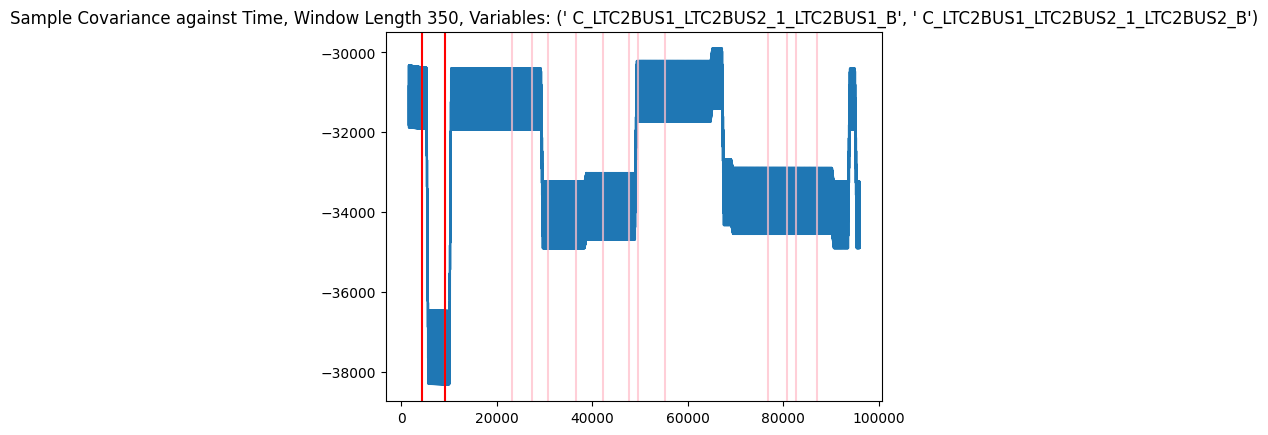

Correlation:


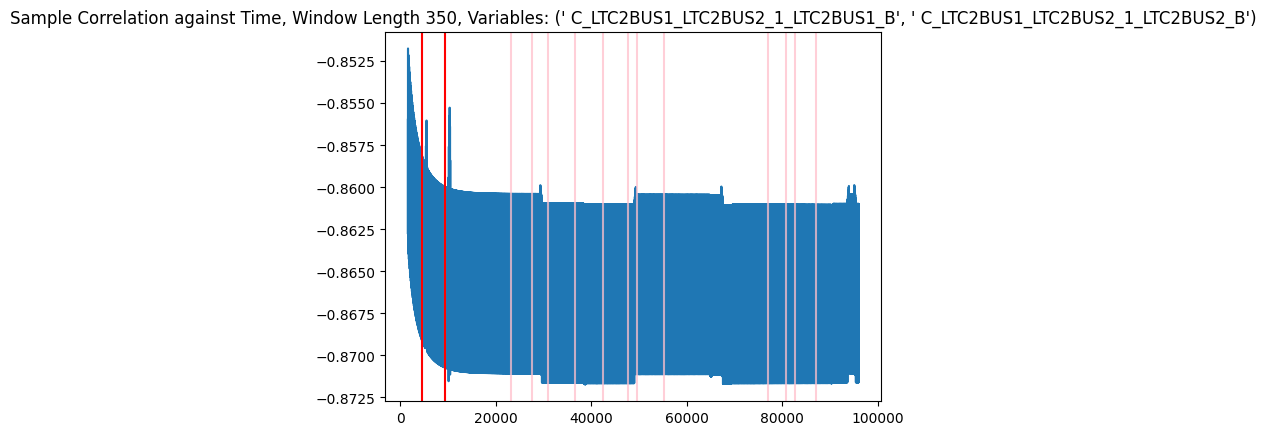

Covariance:


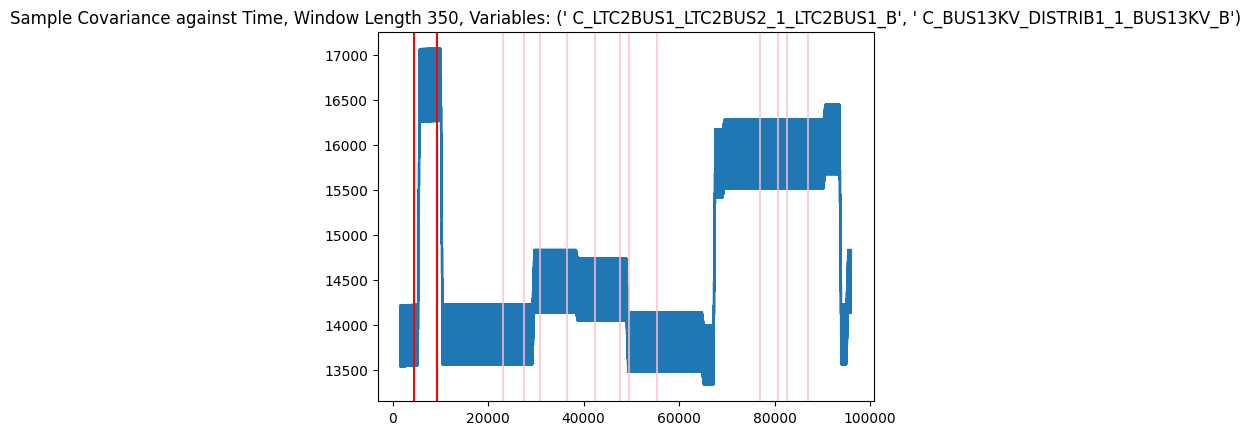

Correlation:


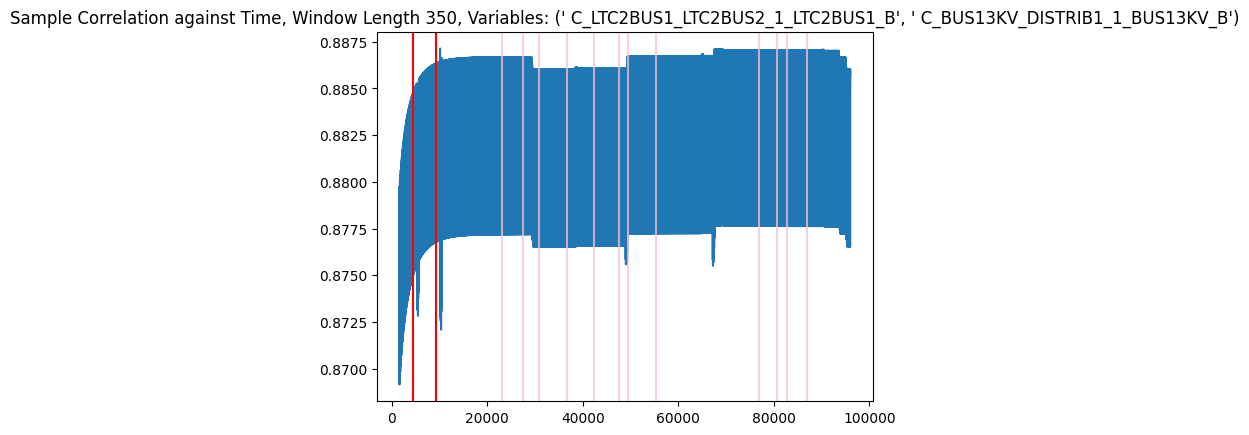

Covariance:


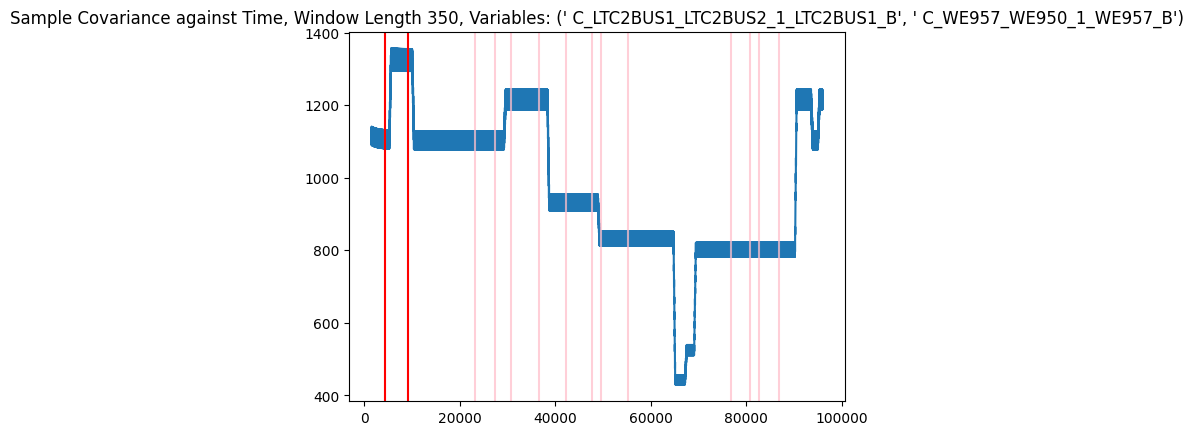

Correlation:


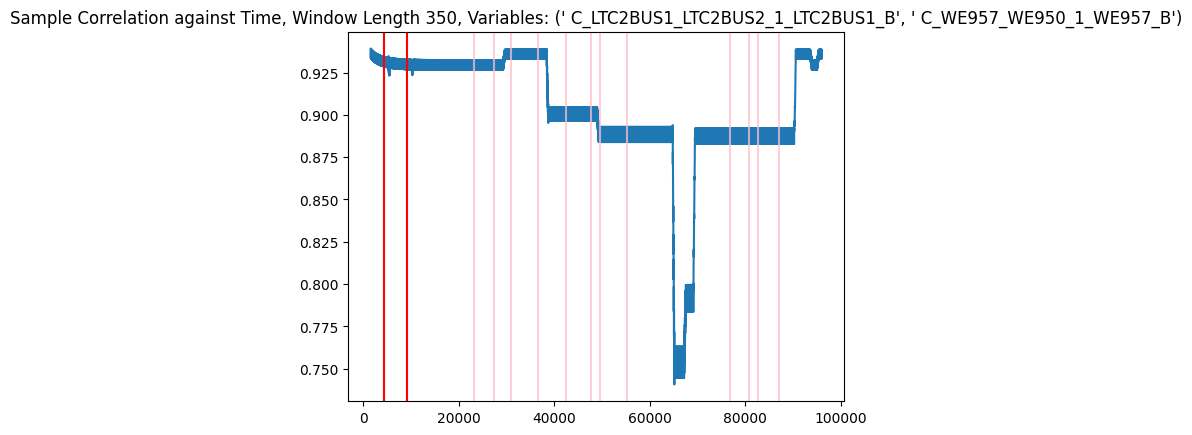

Covariance:


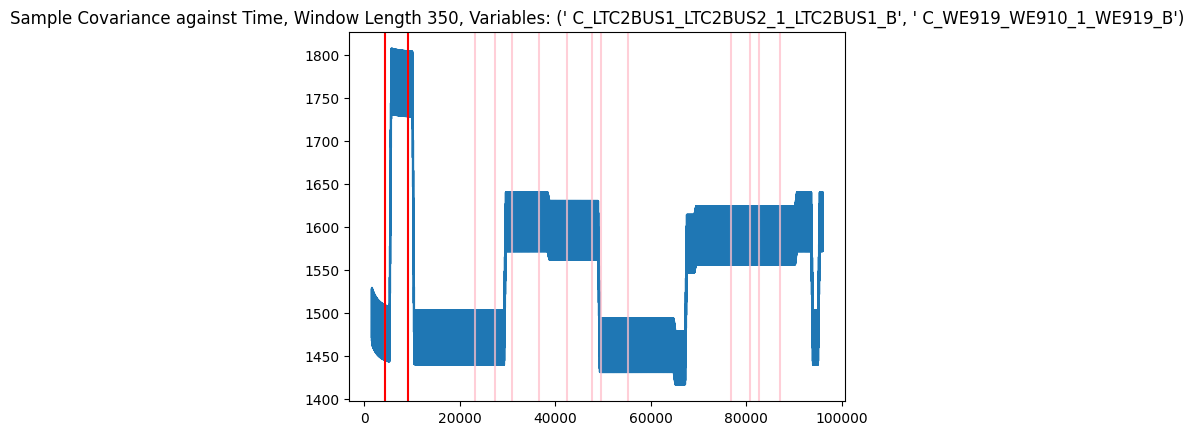

Correlation:


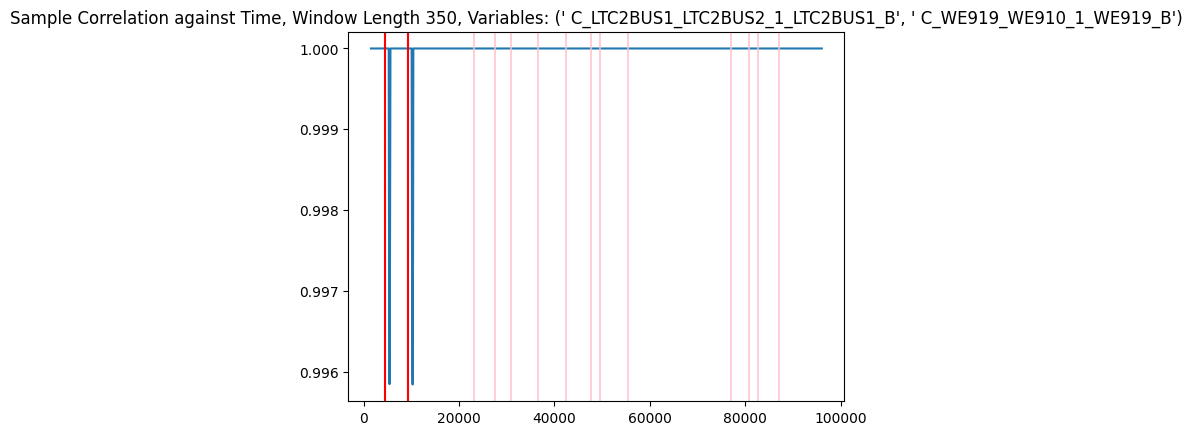

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CTWE8_C number:54, Time Attacked: 1.1s to 2.1s
Covariance:


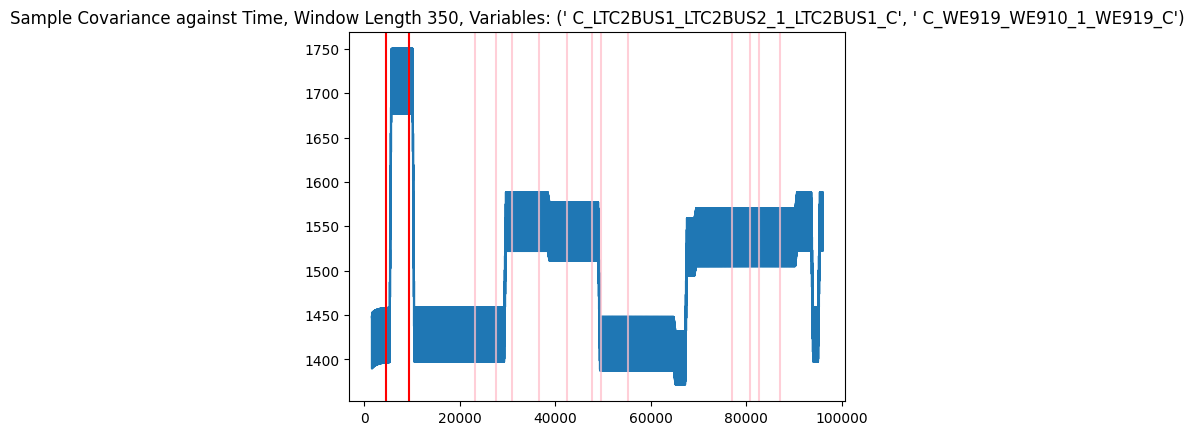

Correlation:


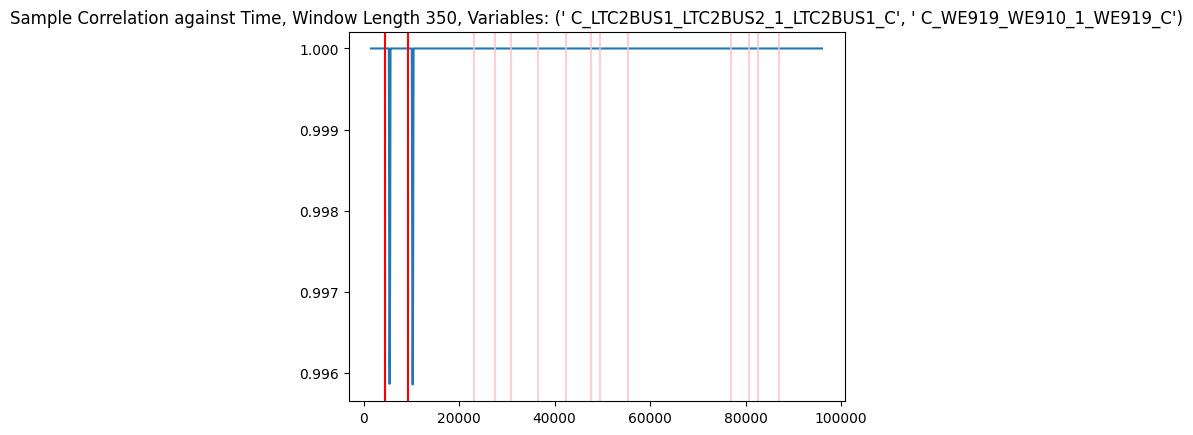

Covariance:


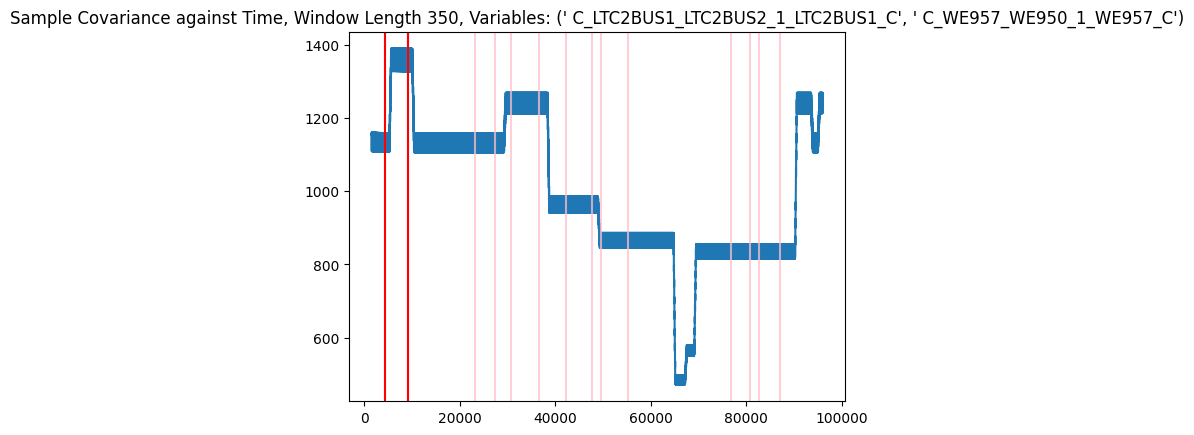

Correlation:


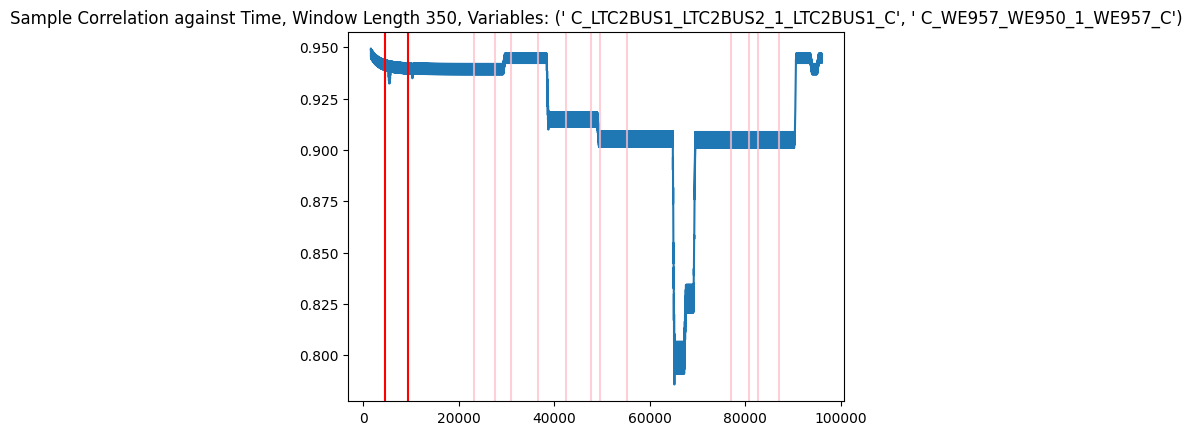

Covariance:


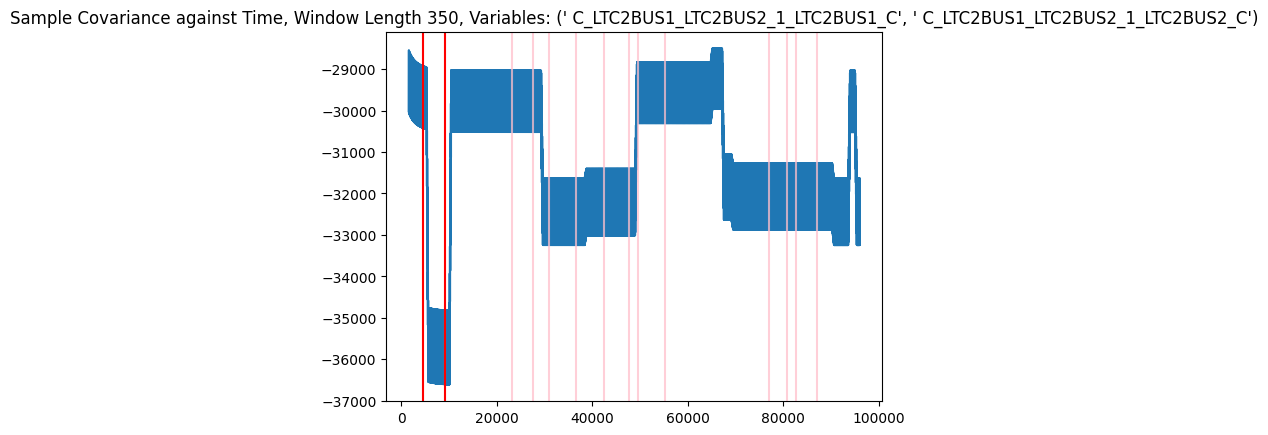

Correlation:


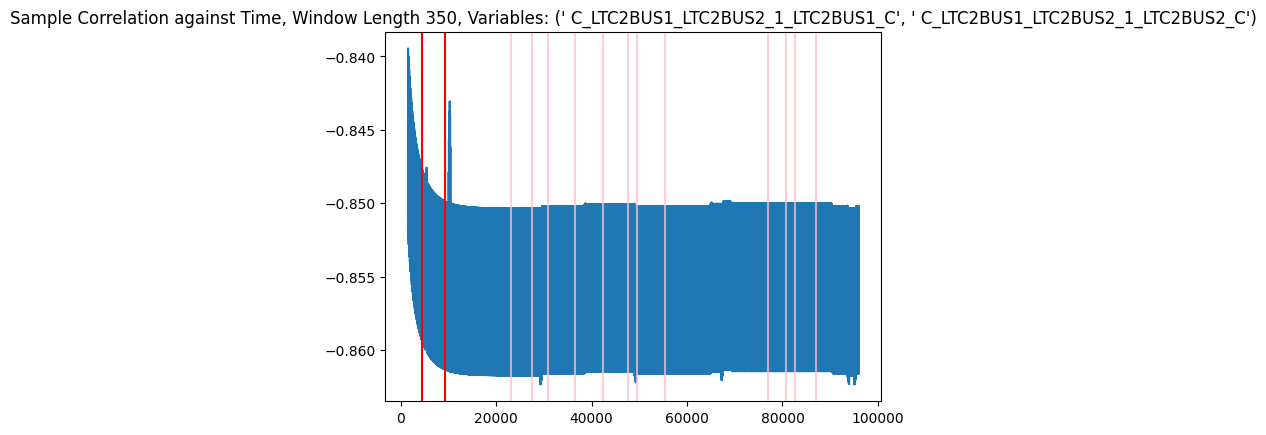

Covariance:


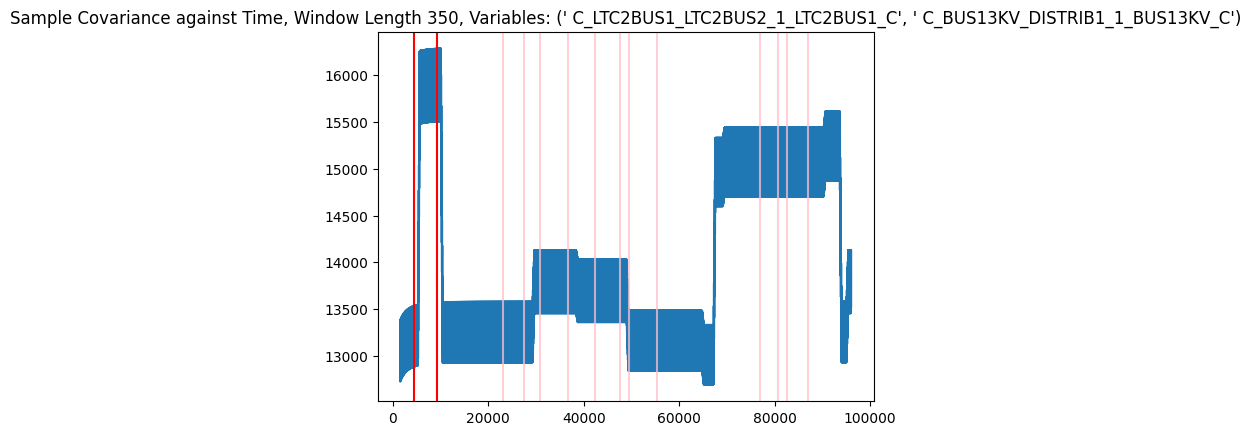

Correlation:


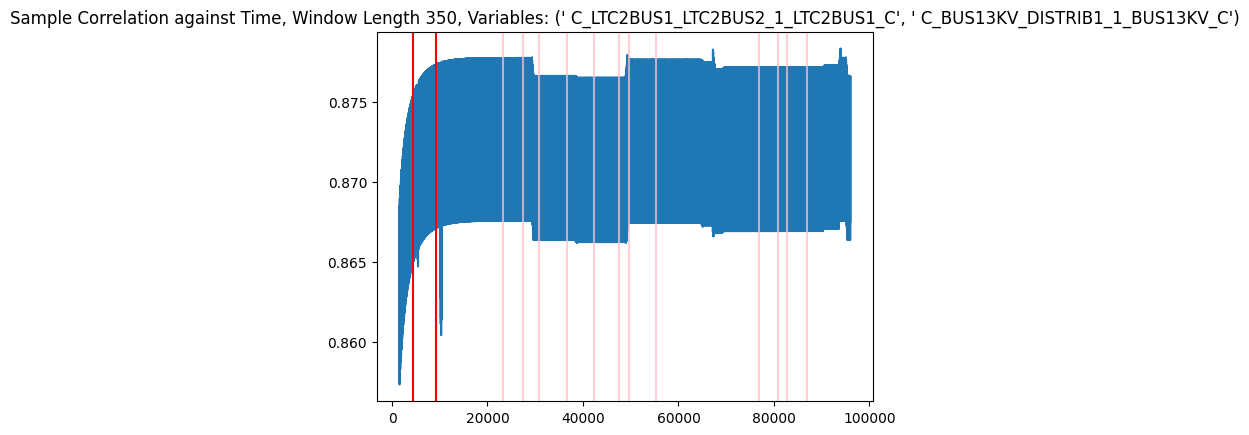

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CTWE8_N number:55, Time Attacked: 1.1s to 2.1s

 V_DBU16_CN has no neighbours

***********************************************************************************************
Attacked Sensor: V_PTWE4_AN number:5, Time Attacked: 5.0s to 5.9s
Covariance:


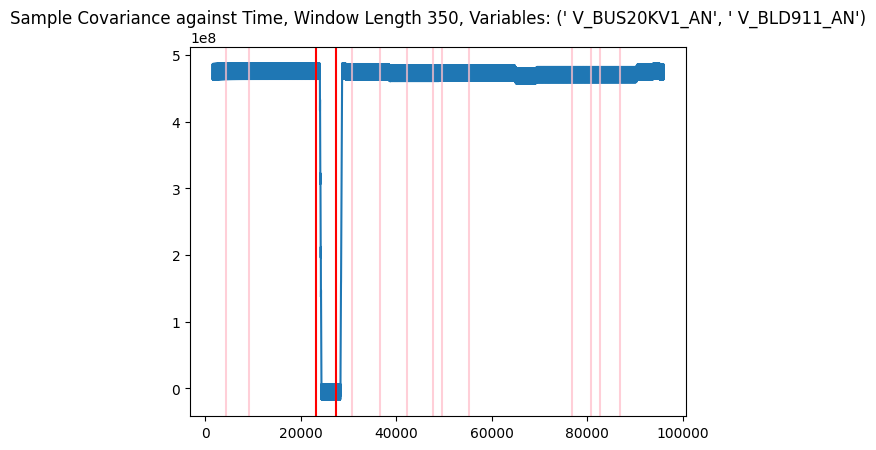

Correlation:


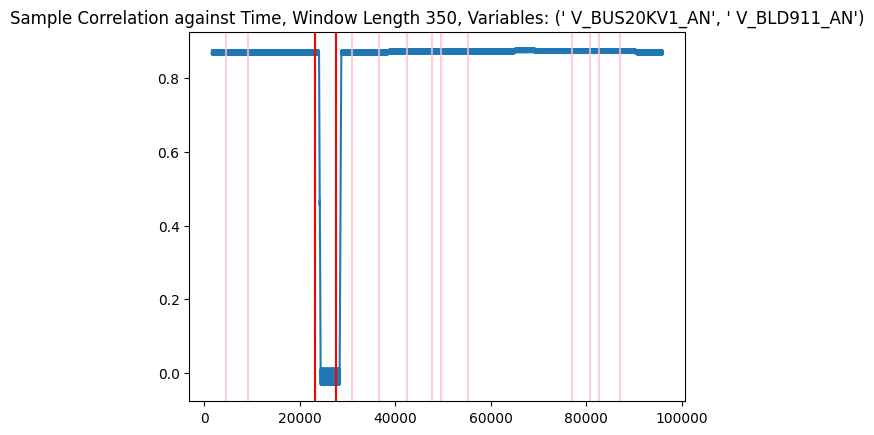

Covariance:


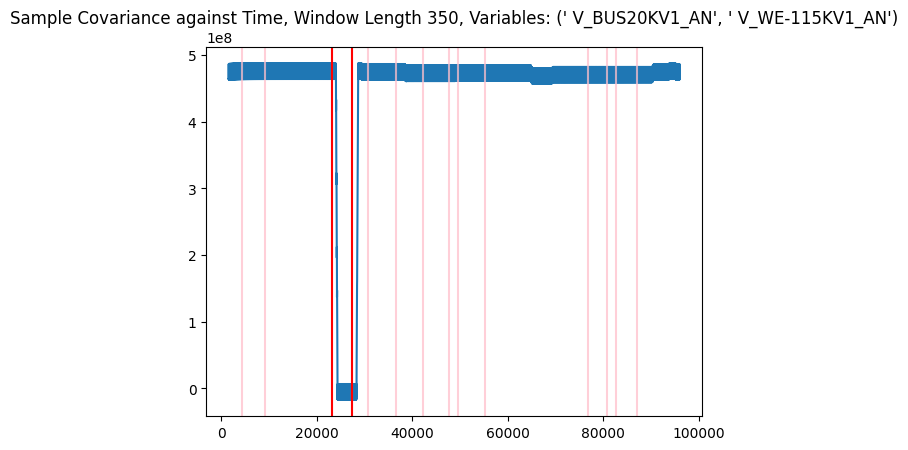

Correlation:


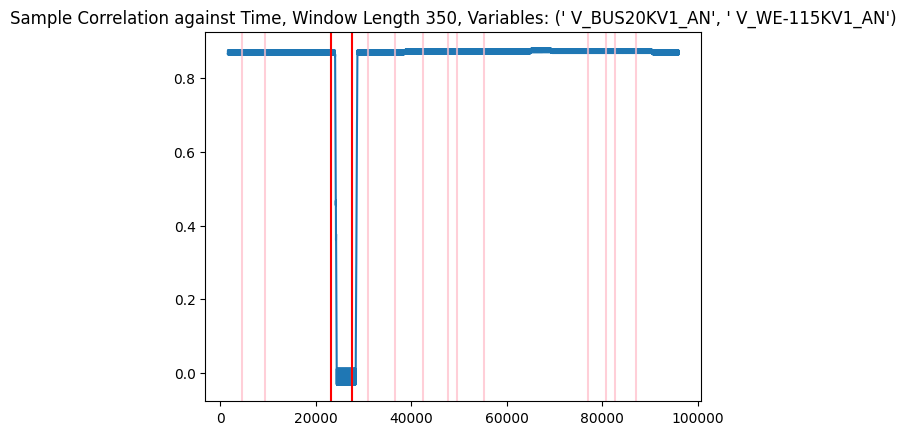

Covariance:


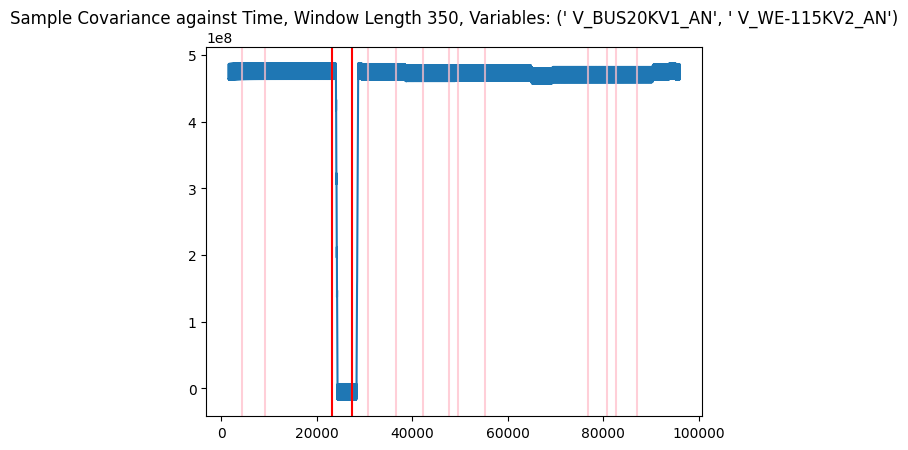

Correlation:


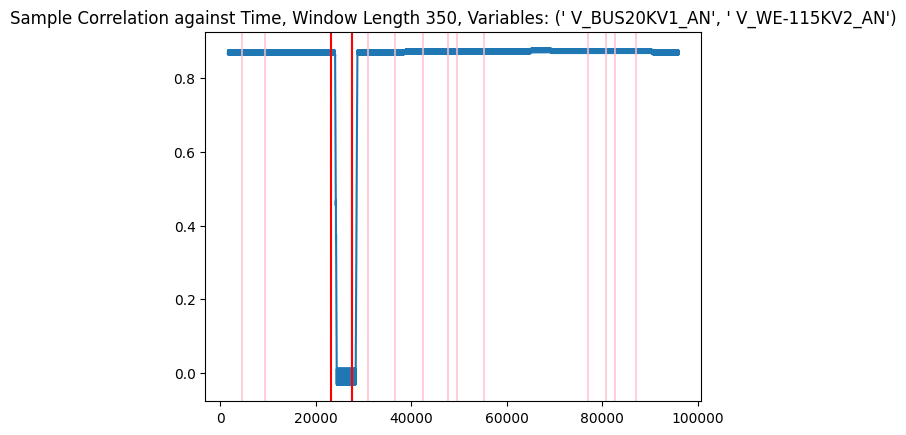

Covariance:


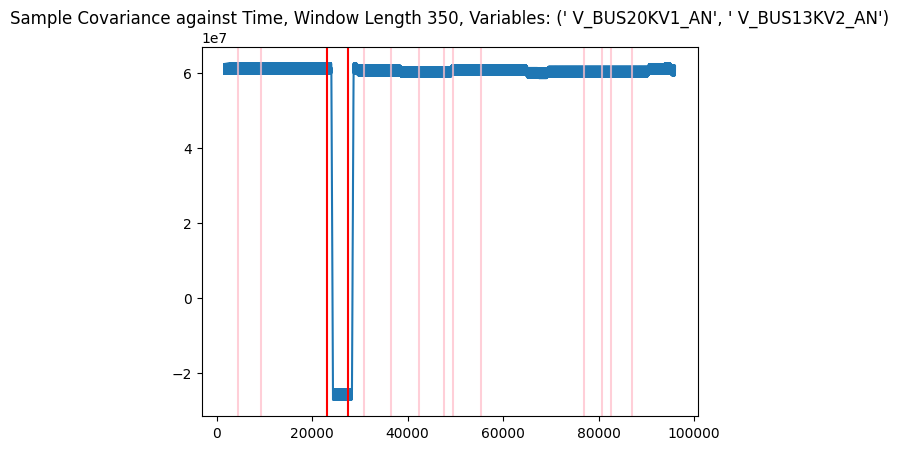

Correlation:


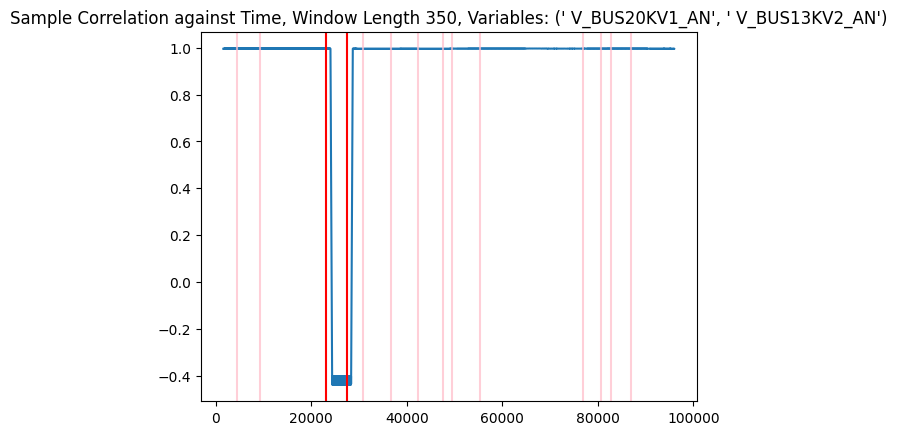

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CT_DIST2_B number:66, Time Attacked: 6.6s to 7.8s
Covariance:


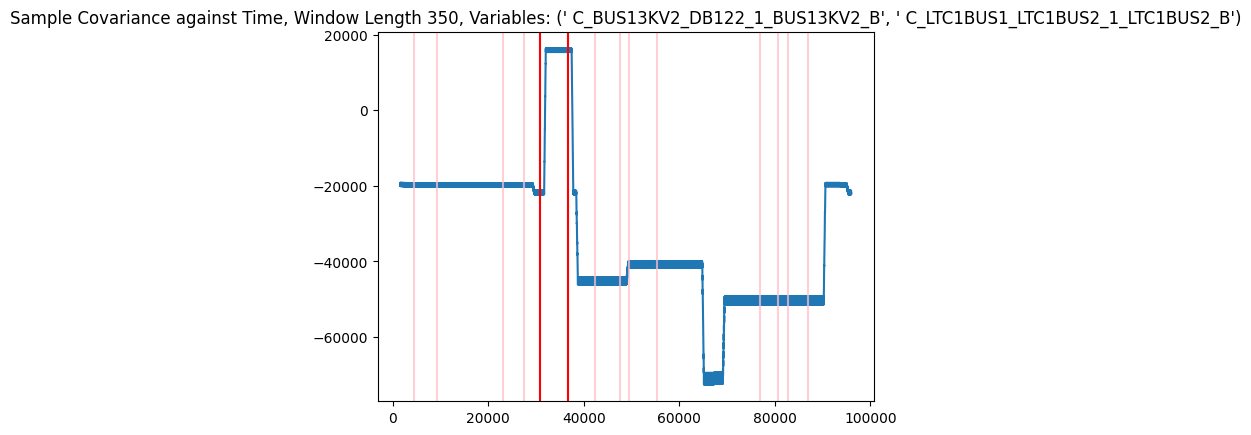

Correlation:


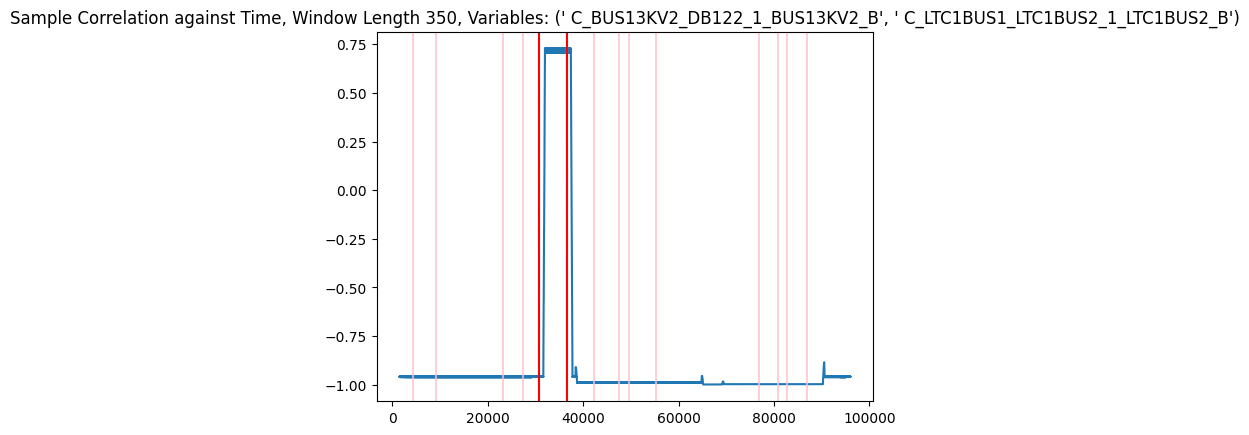

Covariance:


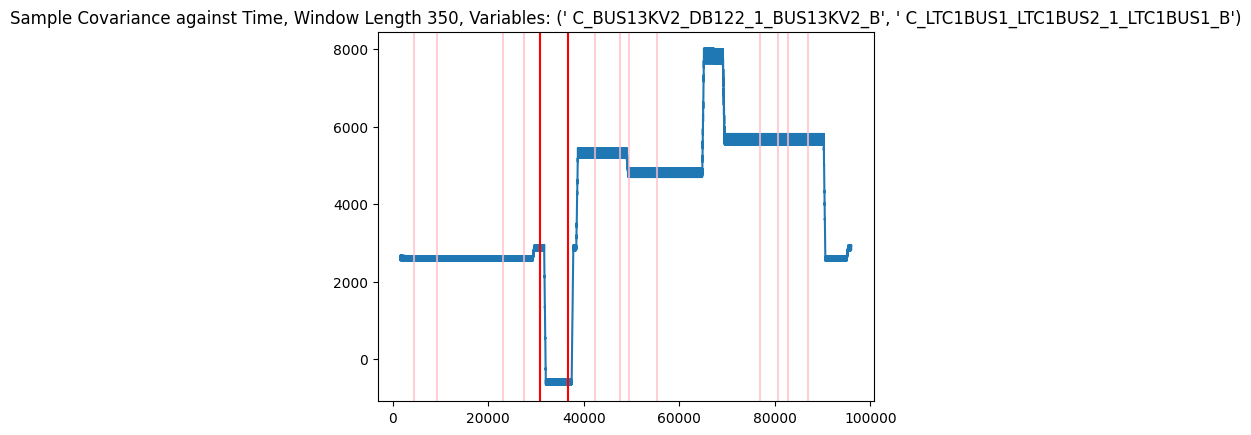

Correlation:


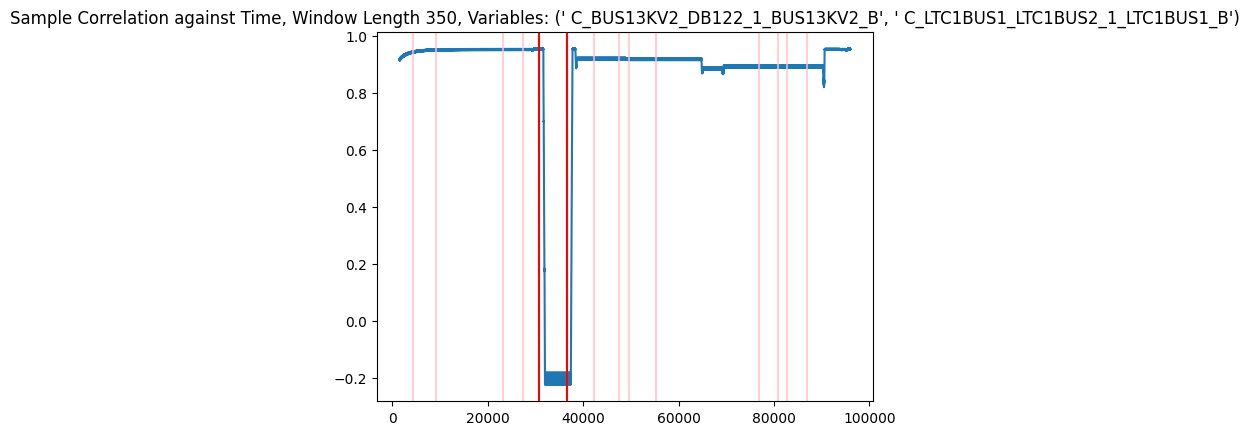

Covariance:


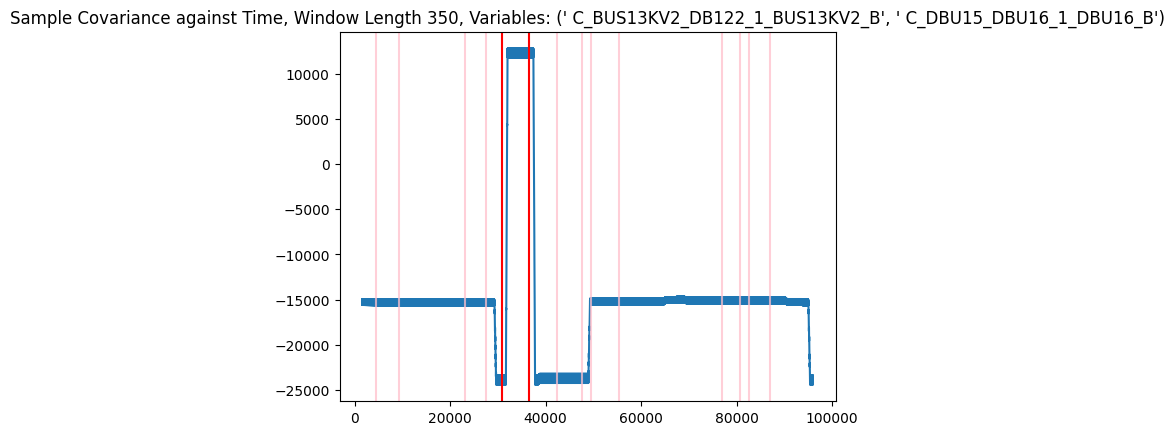

Correlation:


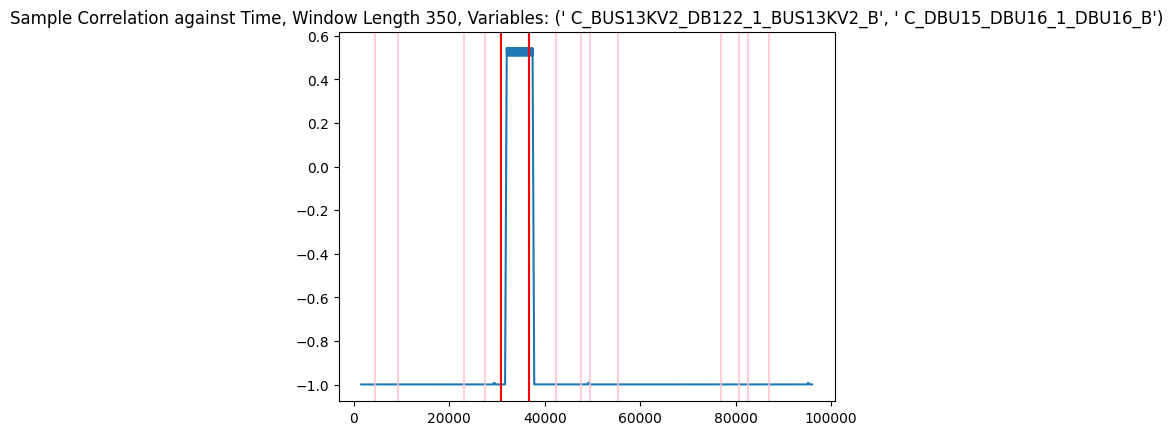

Covariance:


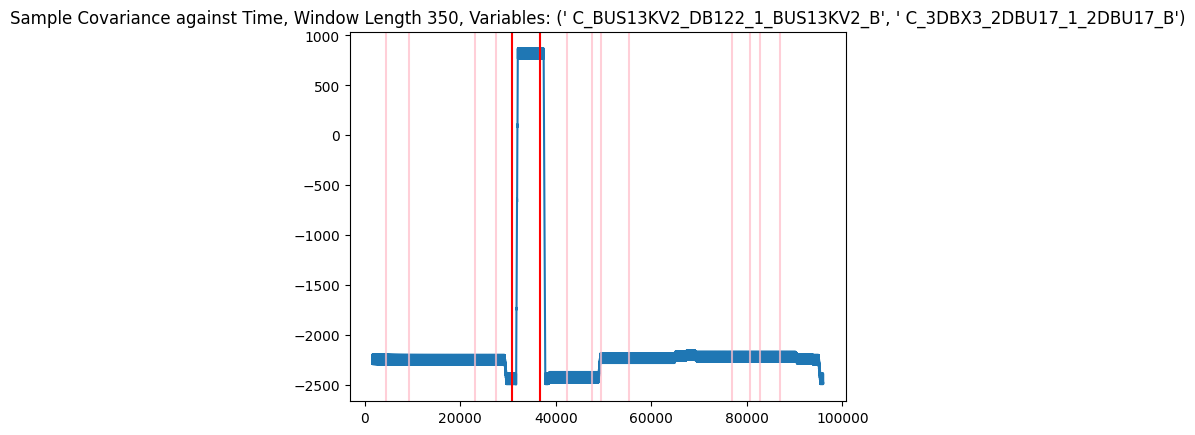

Correlation:


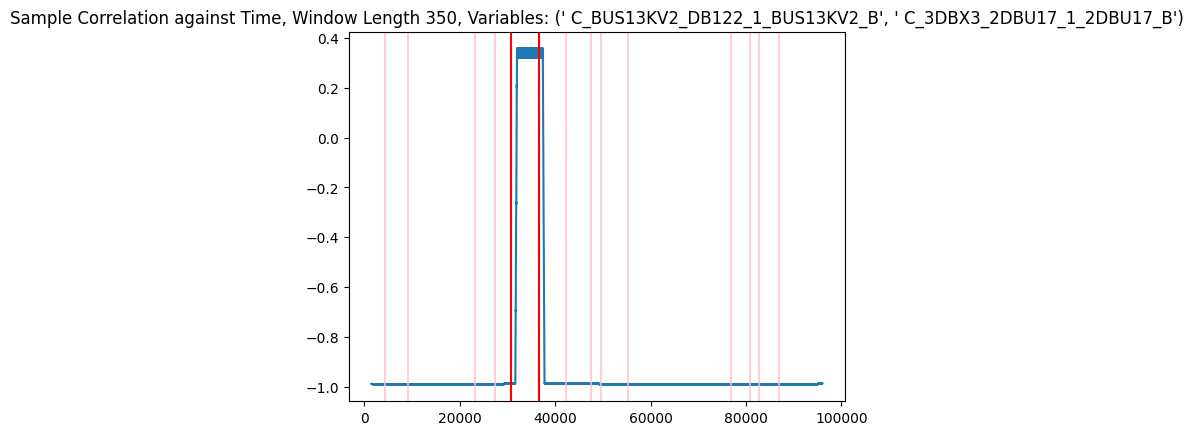

################################################################################################
***********************************************************************************************
Attacked Sensor: V_PT_FDR3_AN number:68, Time Attacked: 9.0s to 10.1s
Covariance:


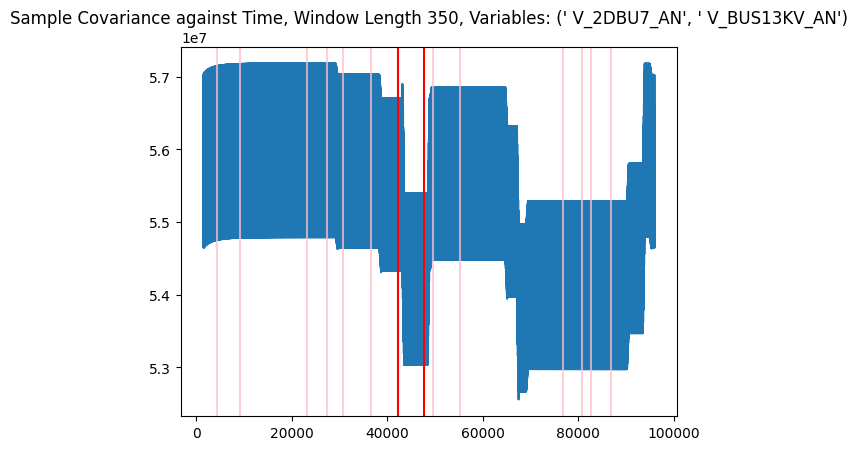

Correlation:


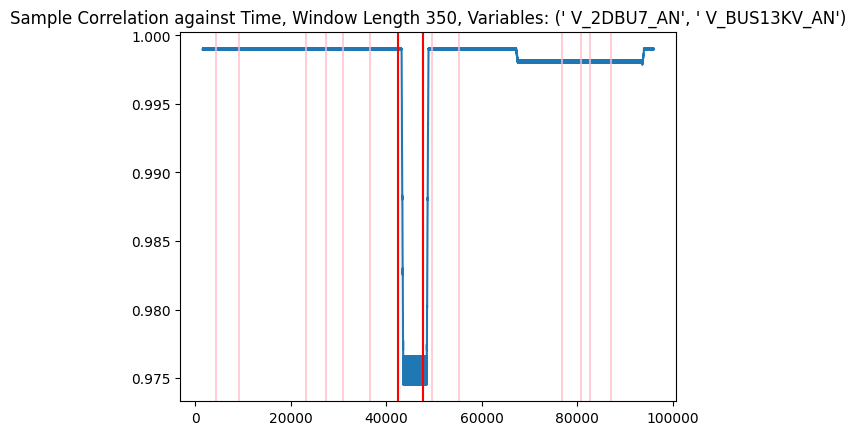

Covariance:


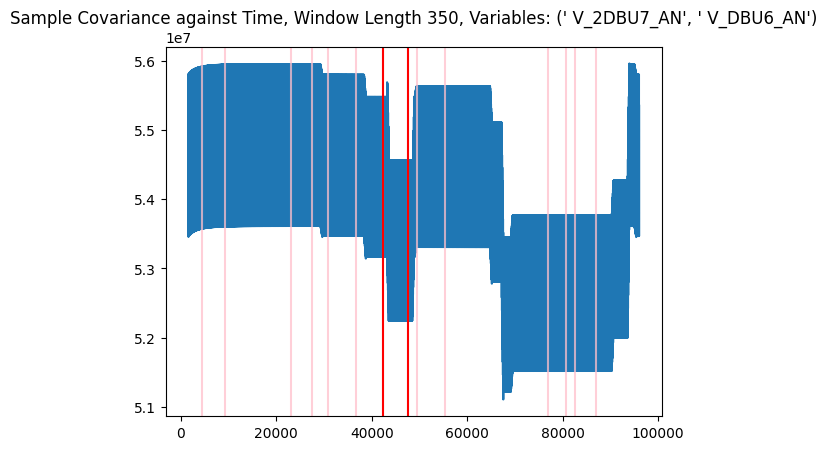

Correlation:


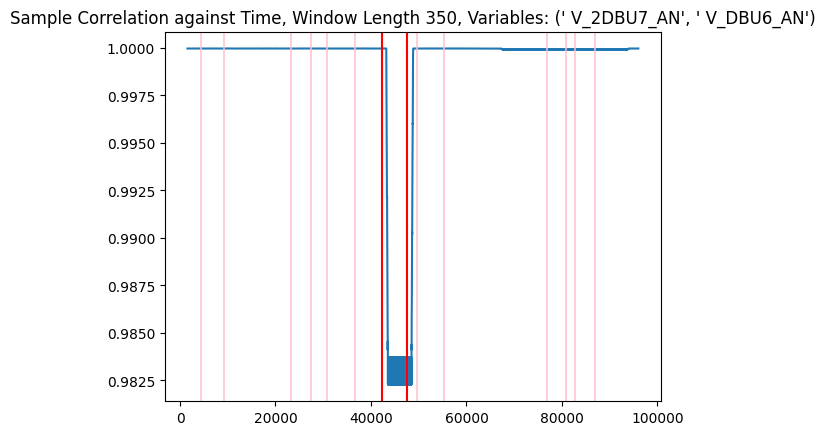

################################################################################################
***********************************************************************************************
Attacked Sensor: V_PT_FDR3_BN number:69, Time Attacked: 9.0s to 10.1s
Covariance:


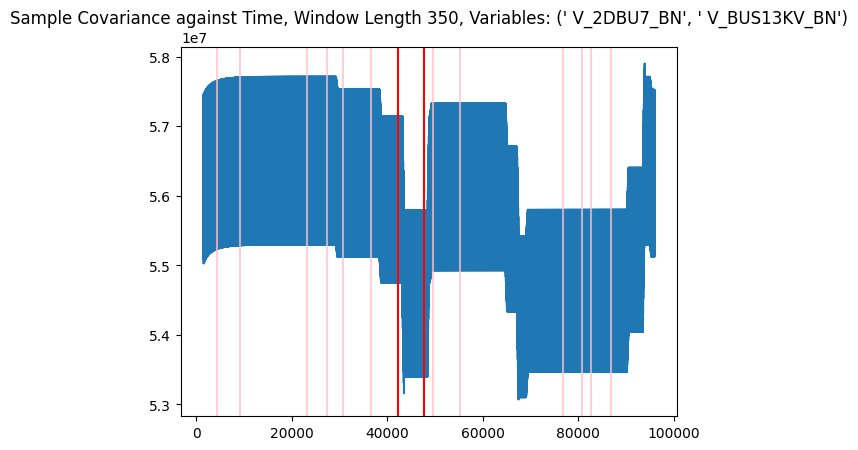

Correlation:


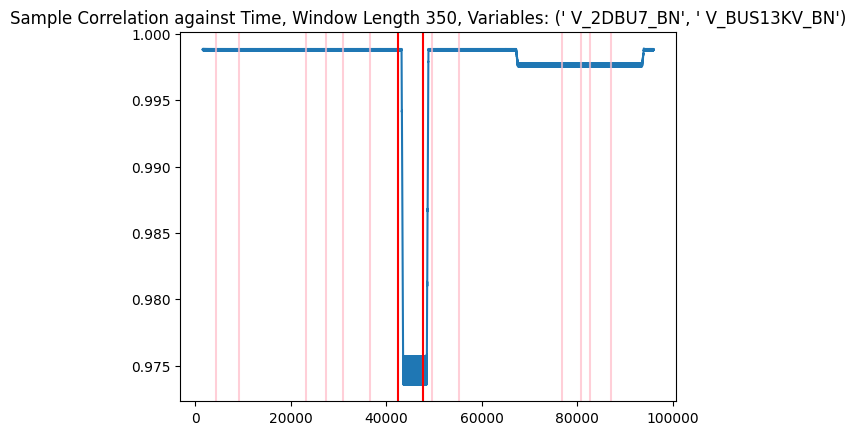

Covariance:


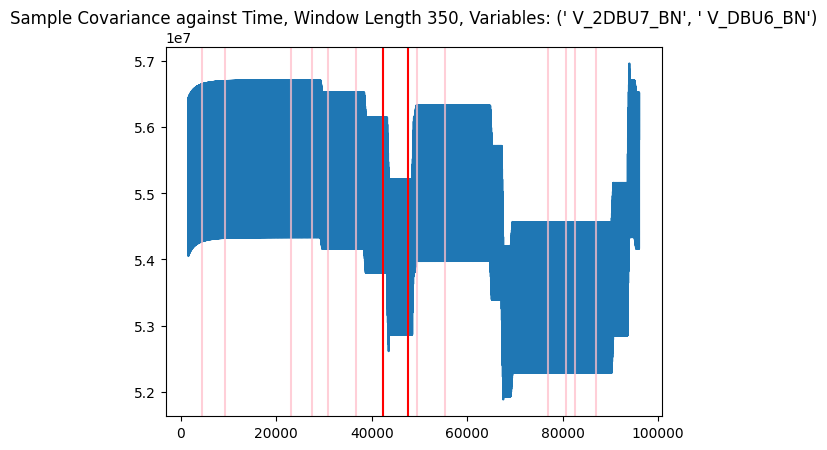

Correlation:


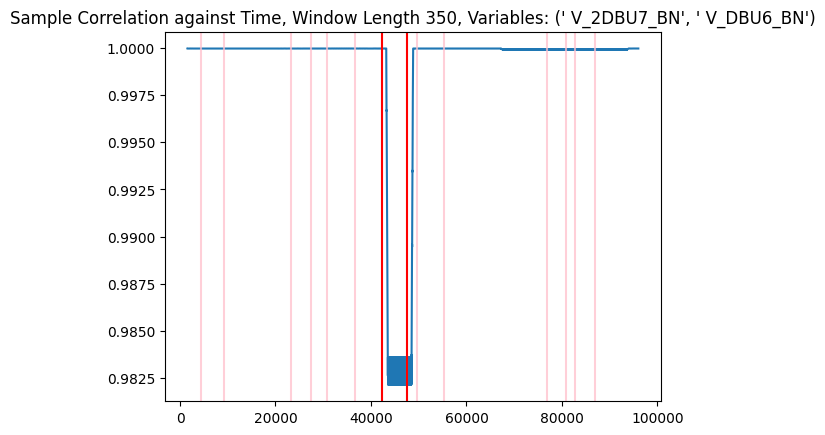

################################################################################################
***********************************************************************************************
Attacked Sensor: V_PT_FDR3_CN number:70, Time Attacked: 9.0s to 10.1s
Covariance:


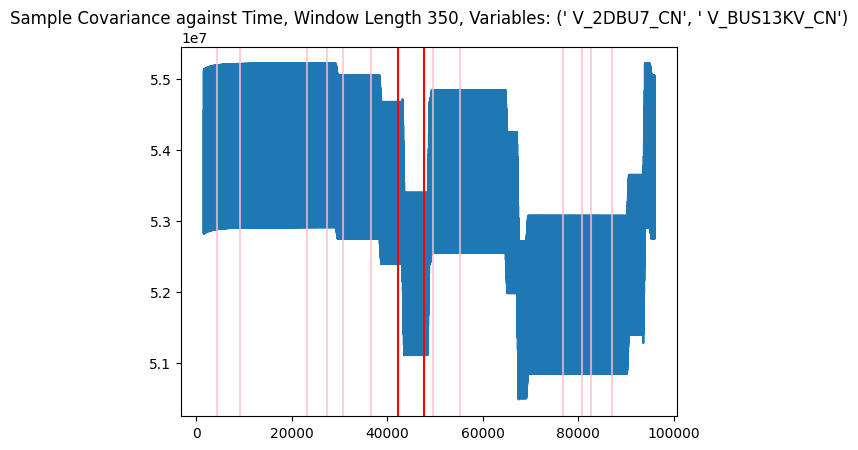

Correlation:


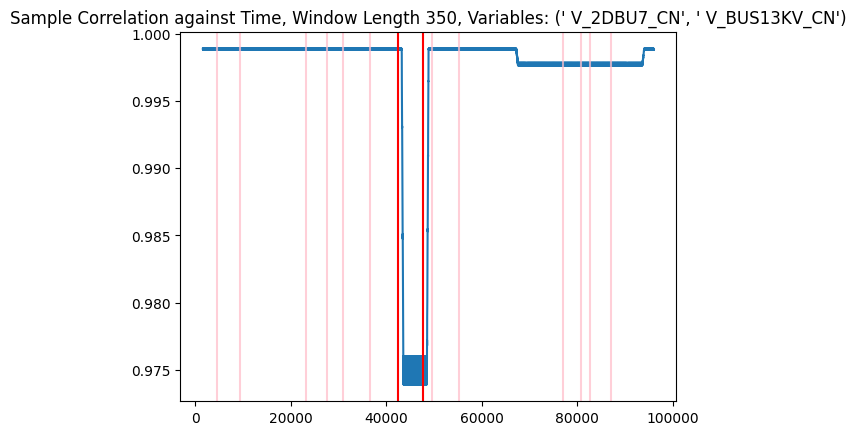

Covariance:


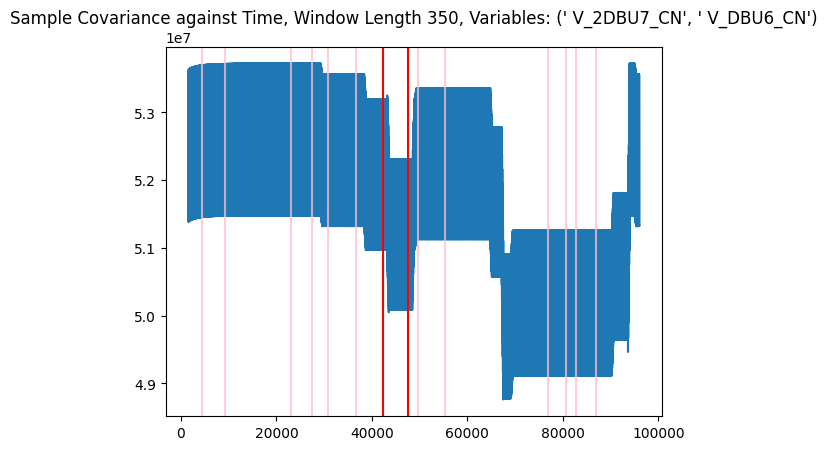

Correlation:


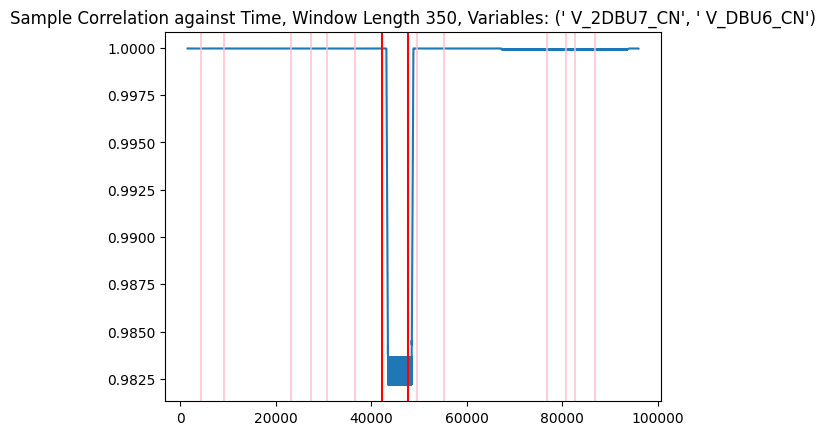

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CT_FDR3_A number:71, Time Attacked: 9.0s to 10.1s
Covariance:


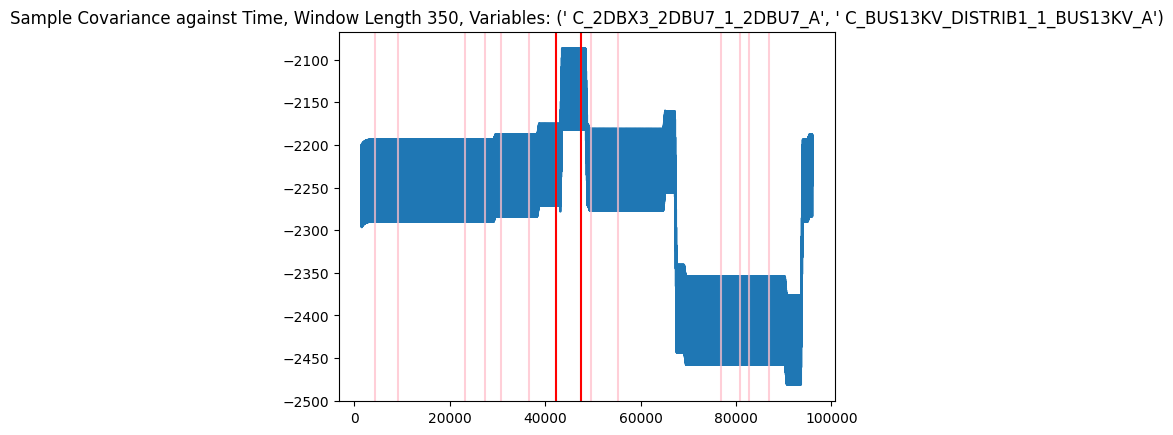

Correlation:


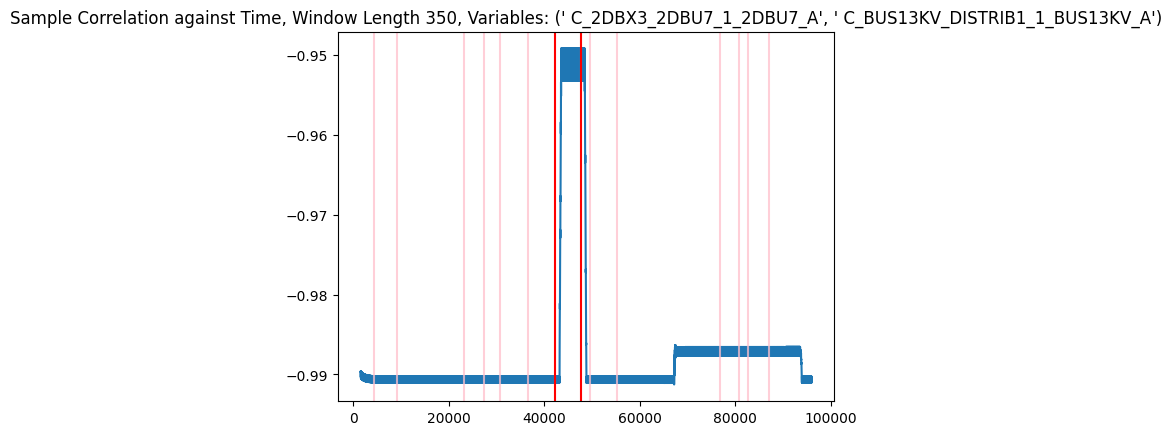

Covariance:


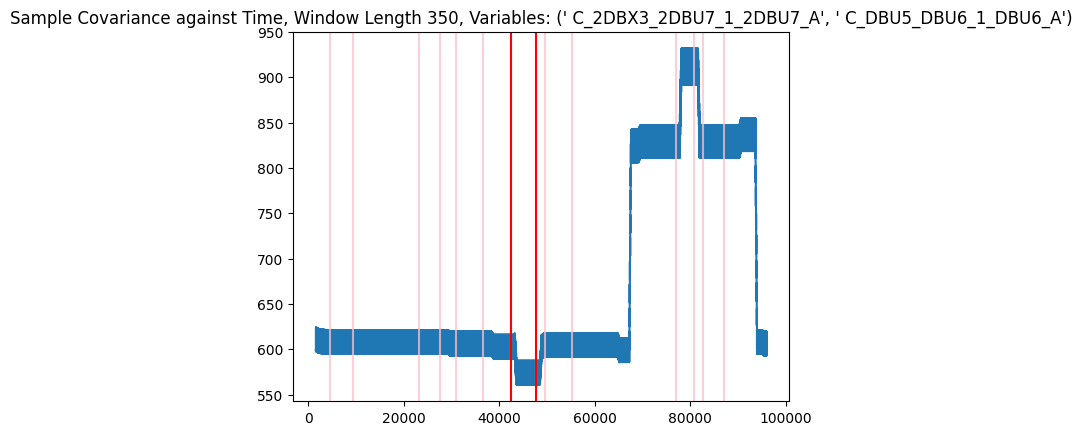

Correlation:


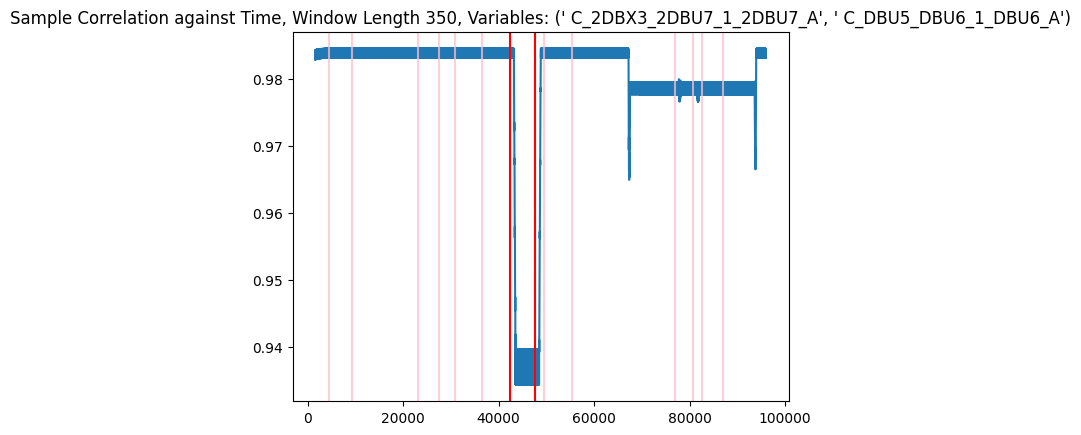

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CT_FDR3_B number:72, Time Attacked: 9.0s to 10.1s
Covariance:


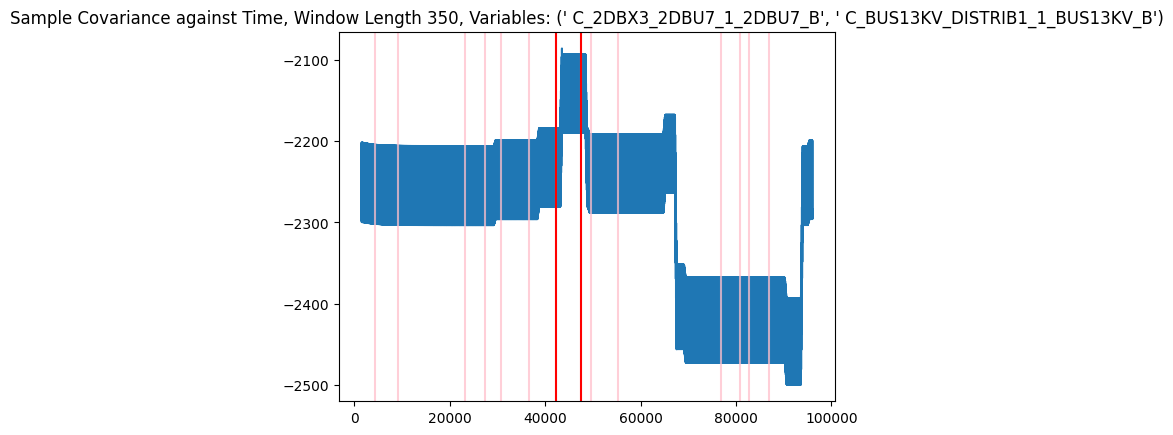

Correlation:


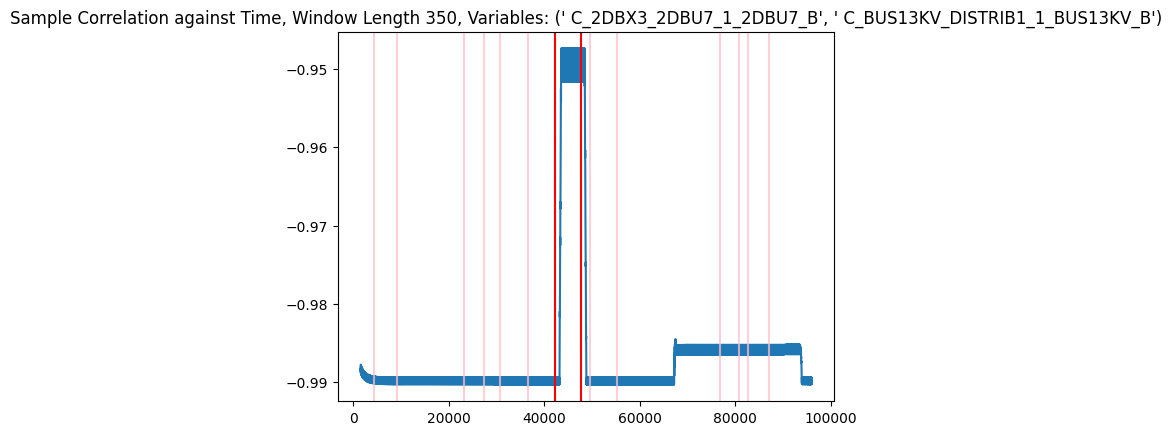

Covariance:


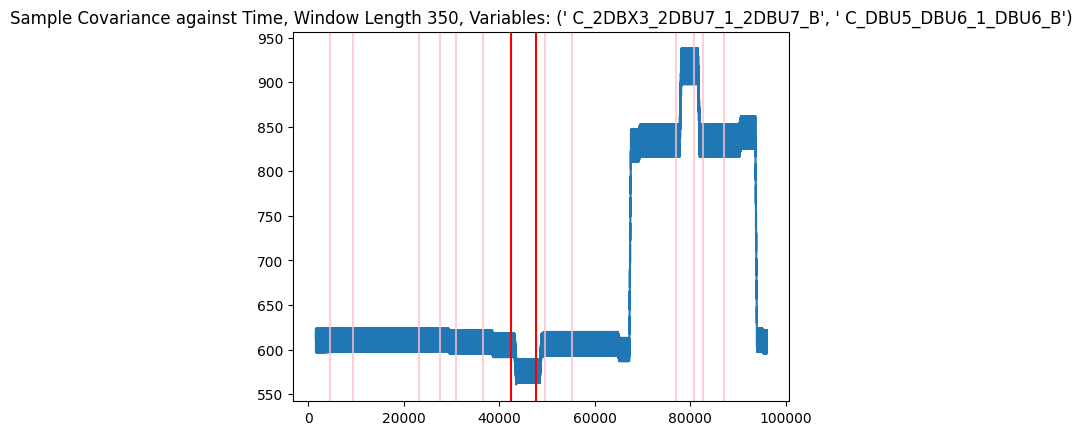

Correlation:


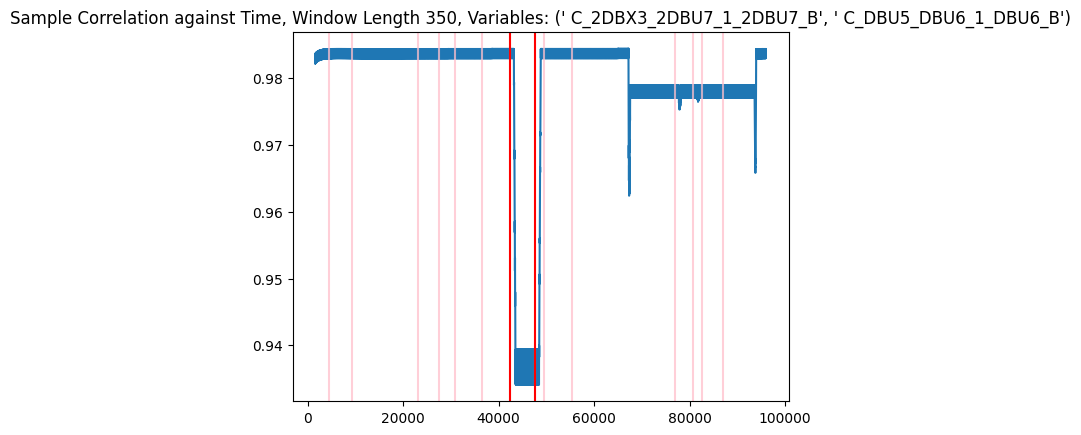

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CT_FDR3_C number:73, Time Attacked: 9.0s to 10.1s
Covariance:


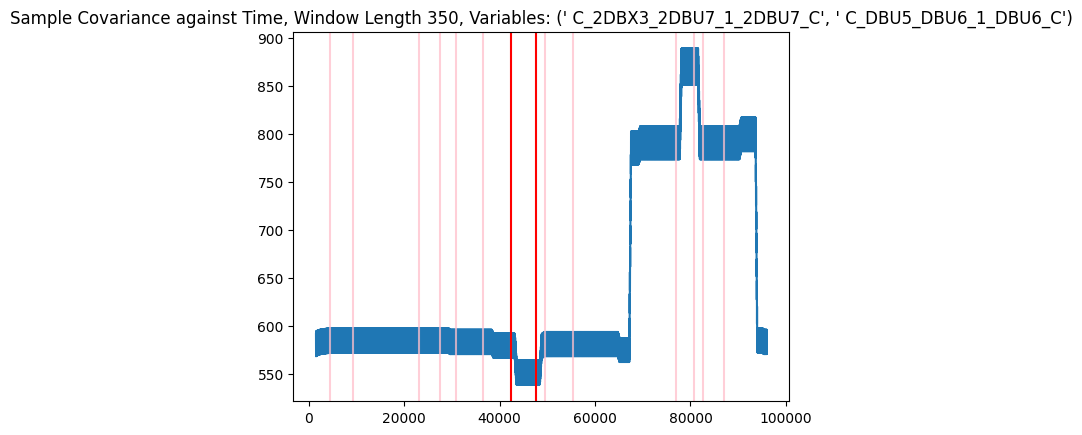

Correlation:


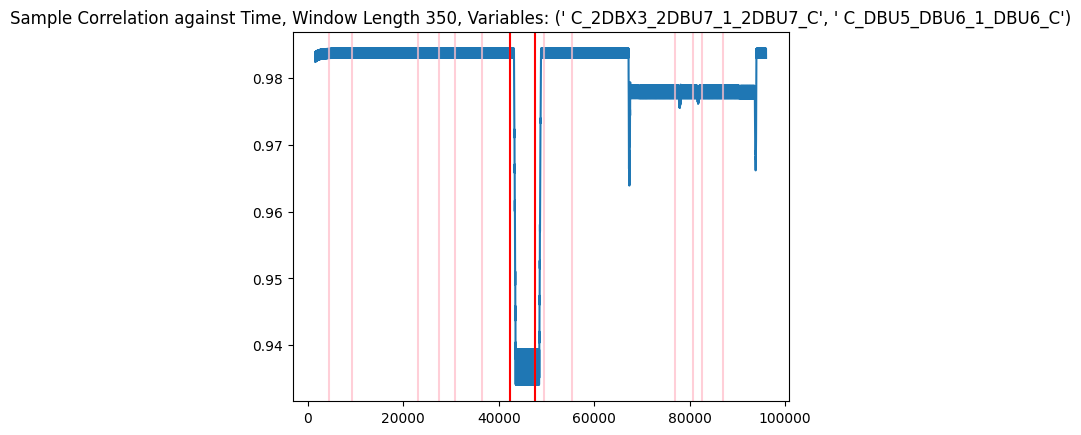

Covariance:


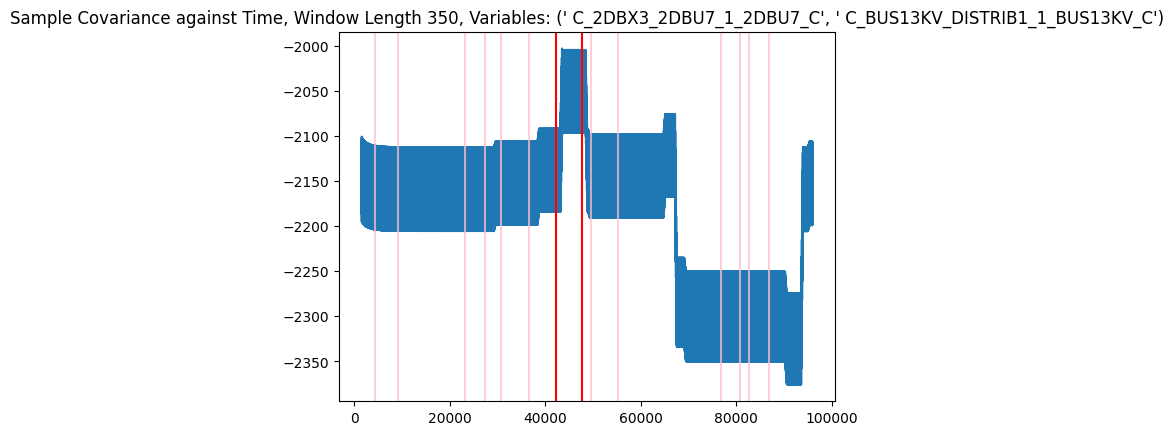

Correlation:


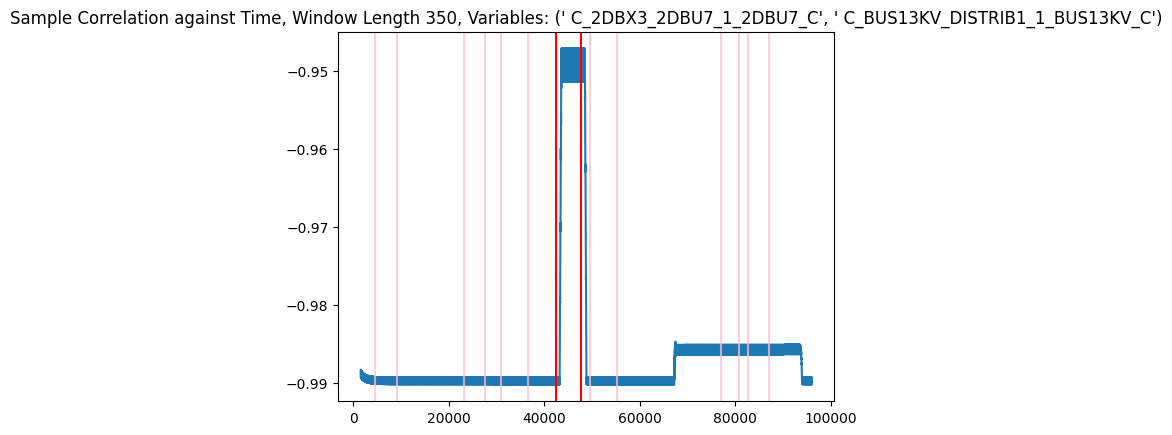

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CTWE2_A number:36, Time Attacked: 10.5s to 11.7s
Covariance:


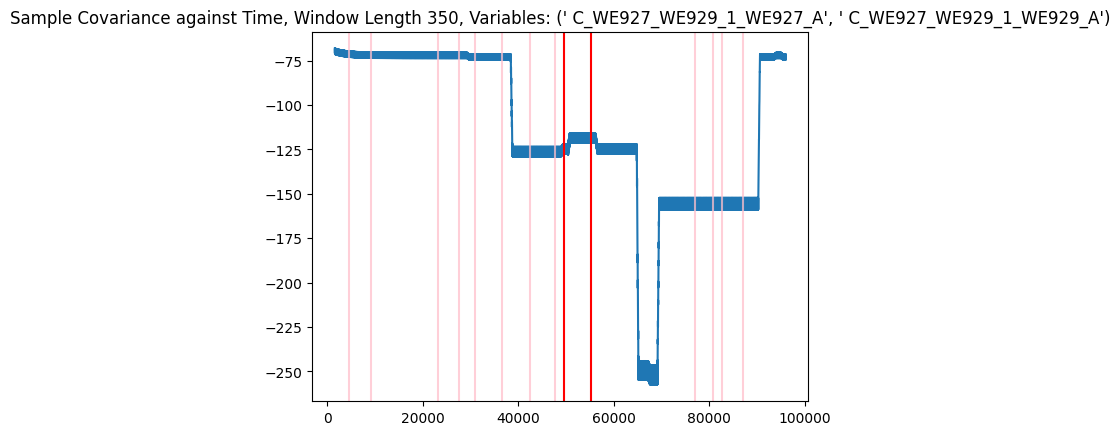

Correlation:


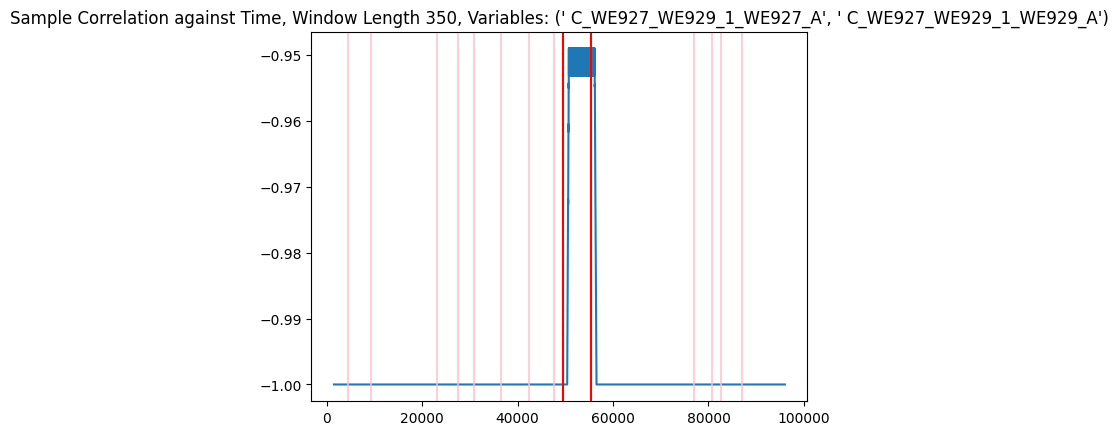

Covariance:


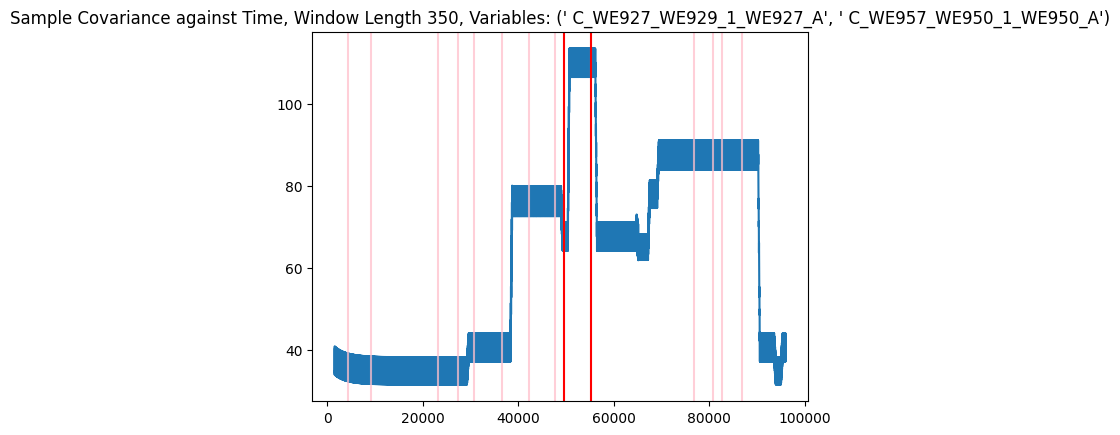

Correlation:


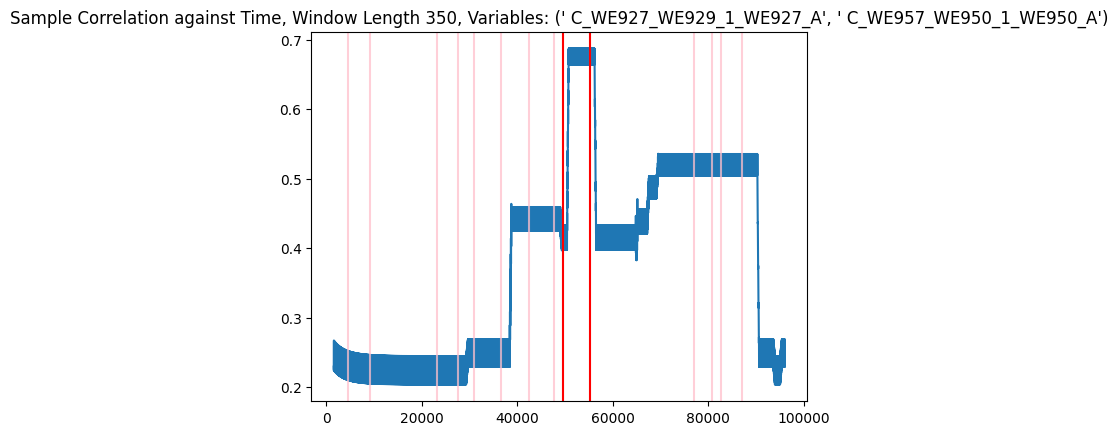

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CTWE2_B number:37, Time Attacked: 10.5s to 11.7s
Covariance:


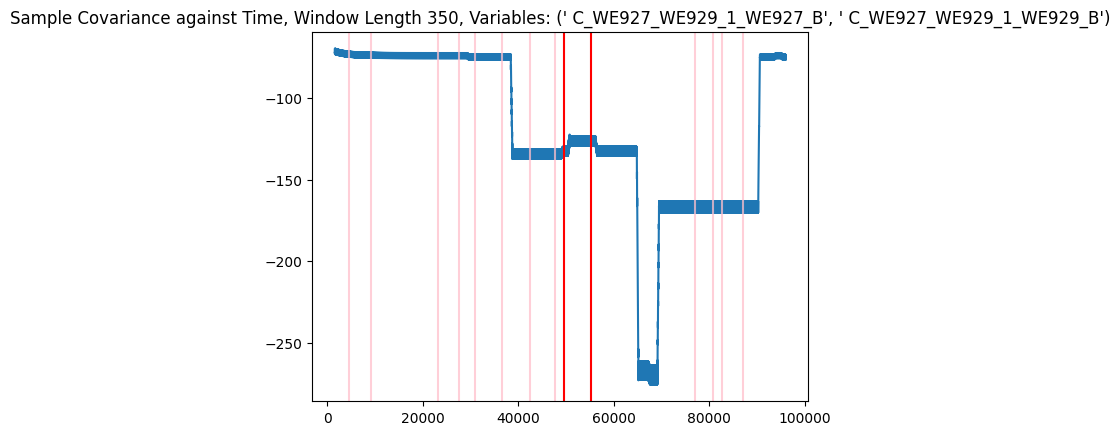

Correlation:


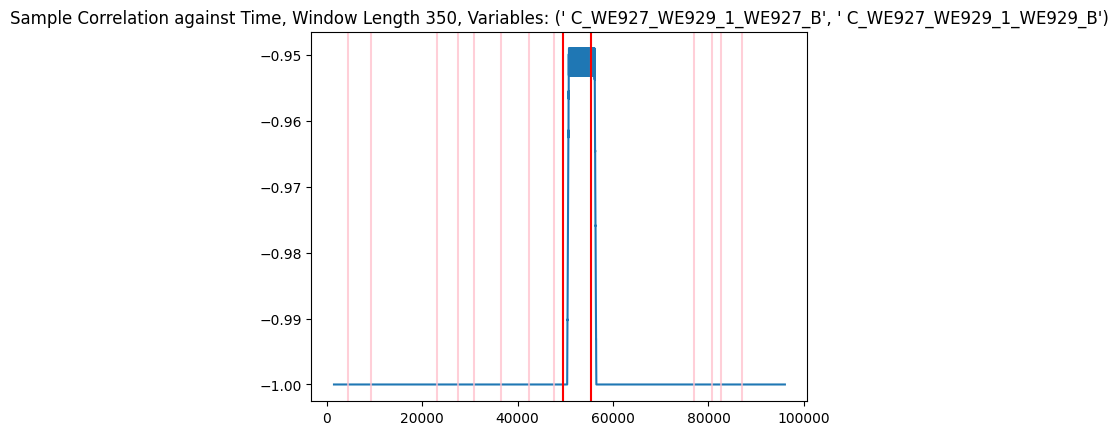

Covariance:


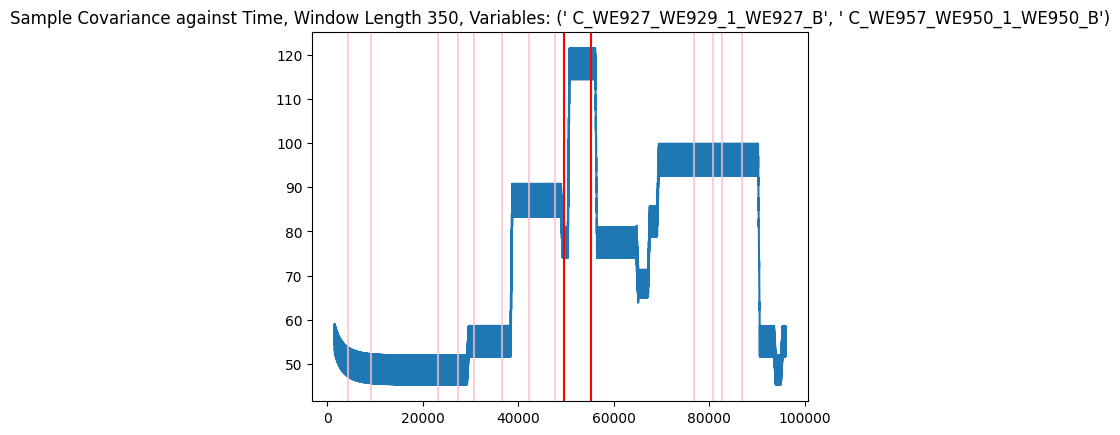

Correlation:


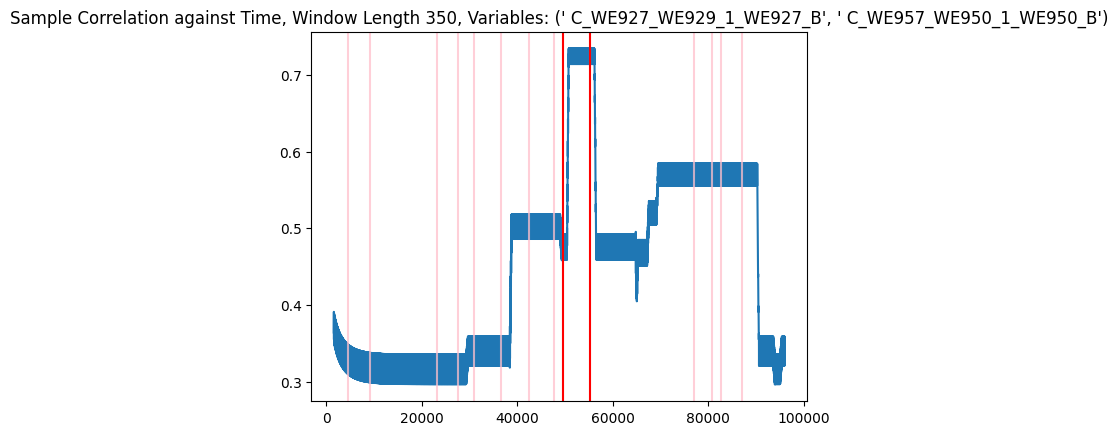

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CTWE2_C number:38, Time Attacked: 10.5s to 11.7s
Covariance:


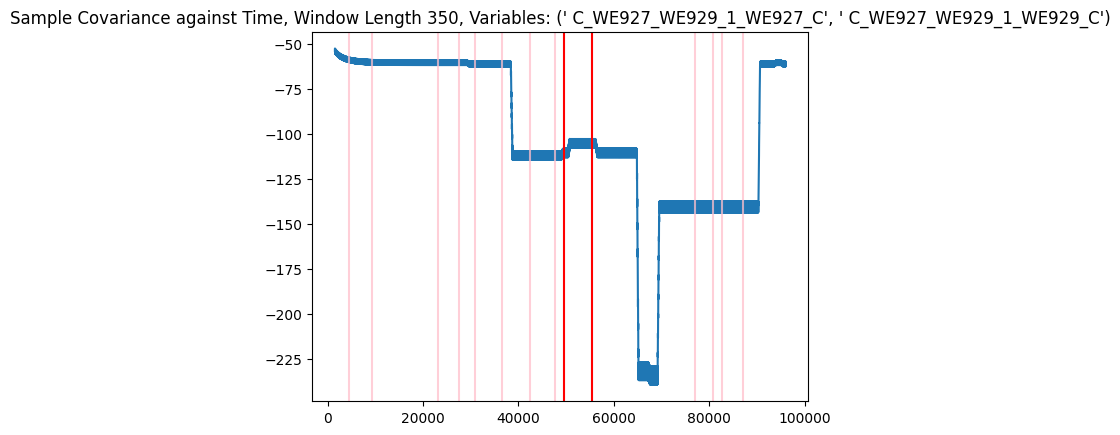

Correlation:


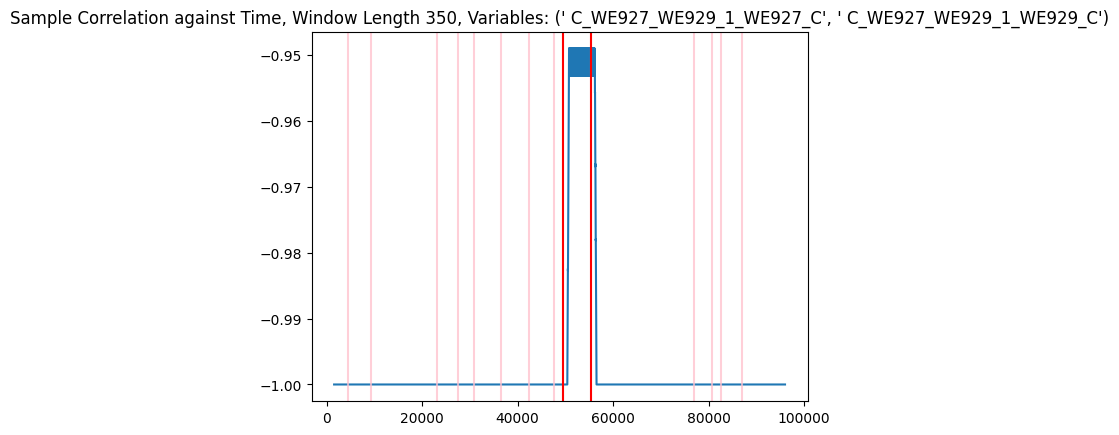

Covariance:


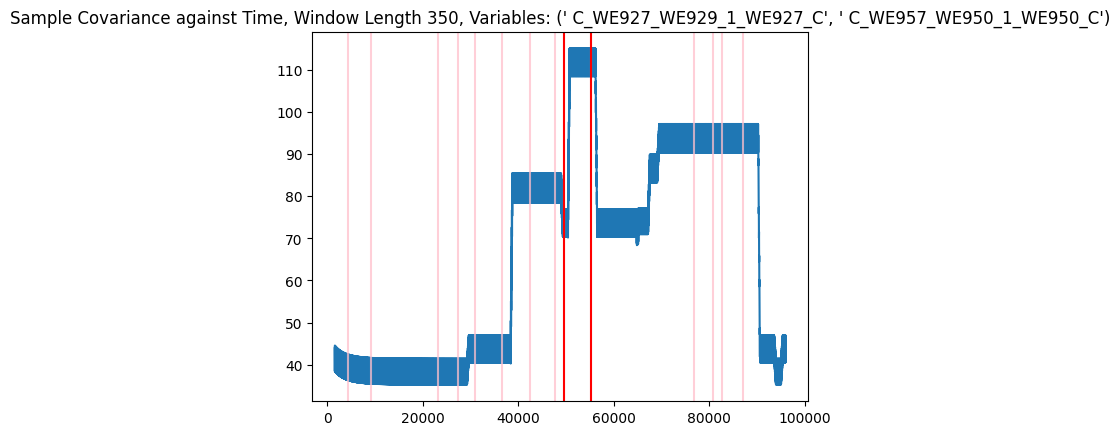

Correlation:


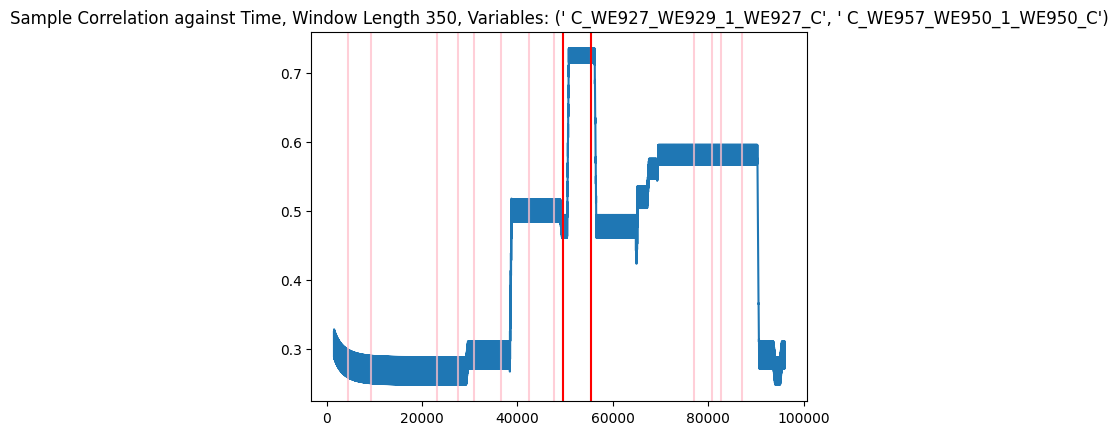

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CTWE2_N number:39, Time Attacked: 10.5s to 11.7s

 V_DBU16_CN has no neighbours

***********************************************************************************************
Attacked Sensor: C_CT_FDR1_A number:77, Time Attacked: 16.2s to 17.0s
Covariance:


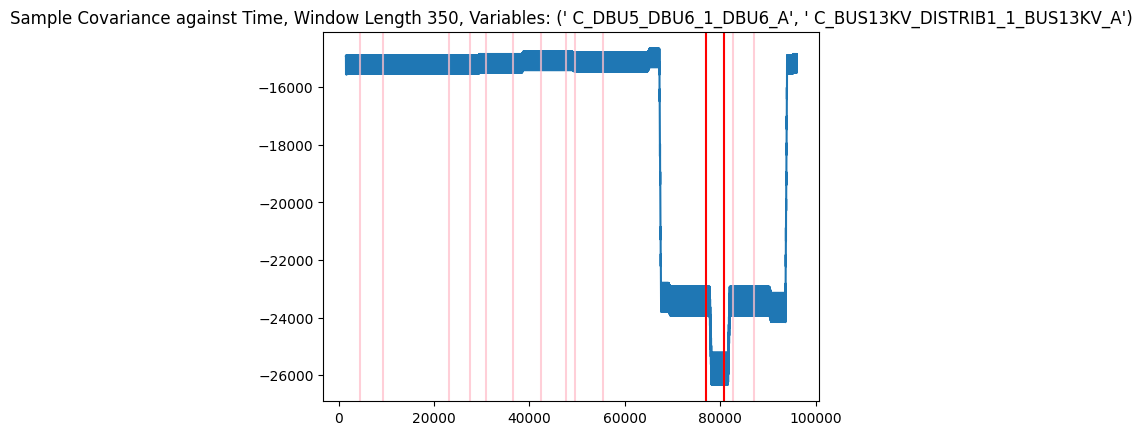

Correlation:


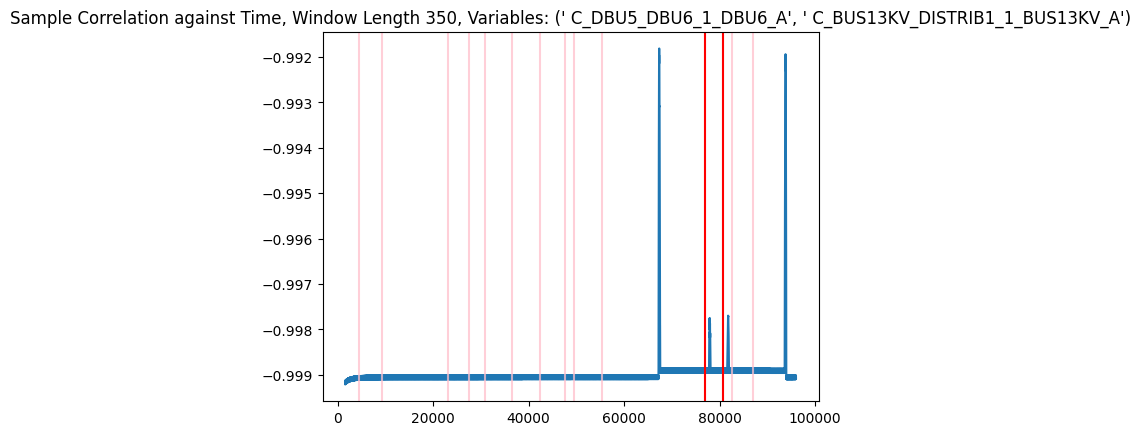

Covariance:


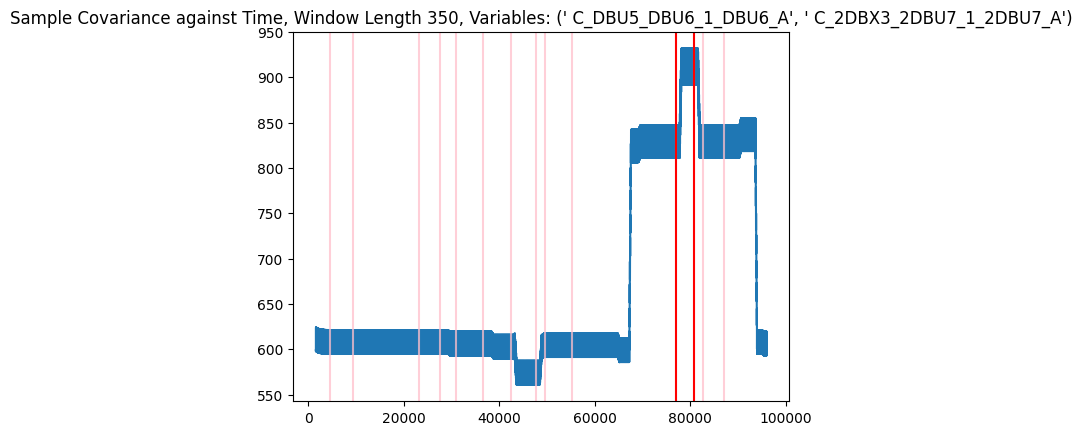

Correlation:


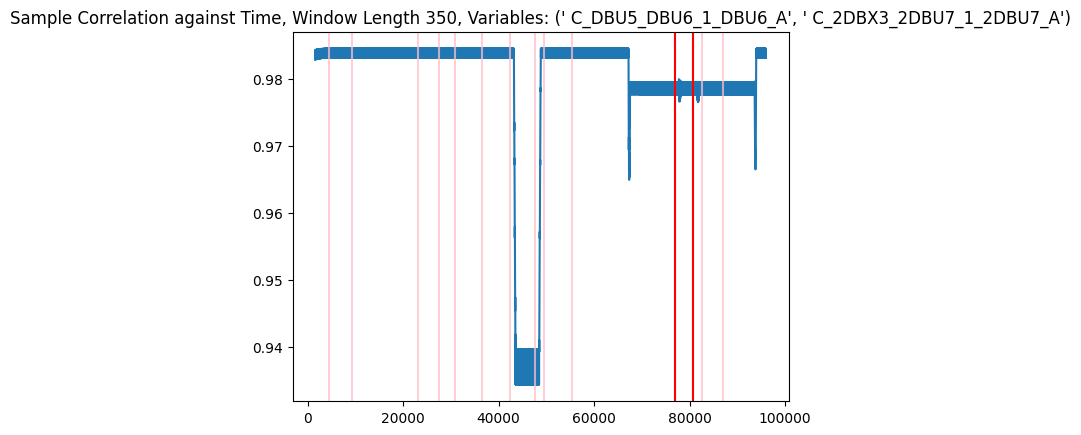

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CT_FDR1_B number:78, Time Attacked: 16.2s to 17.0s
Covariance:


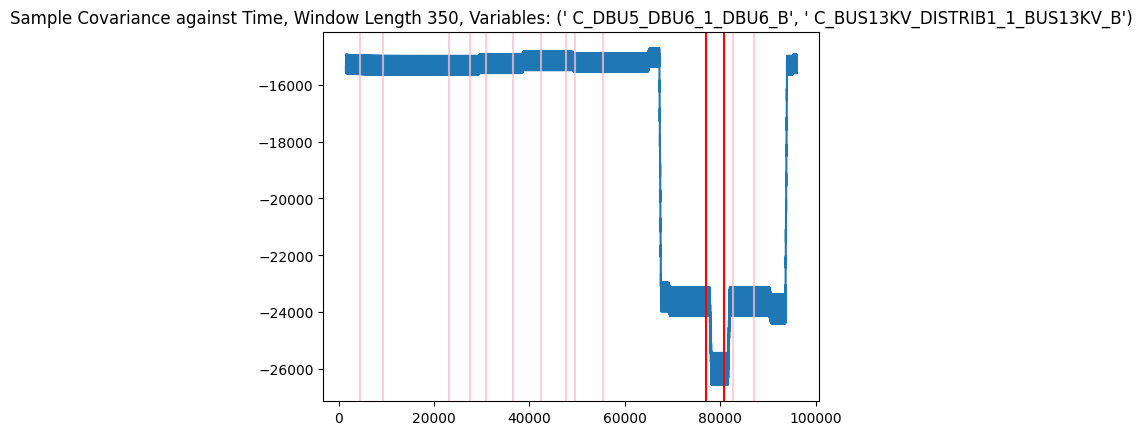

Correlation:


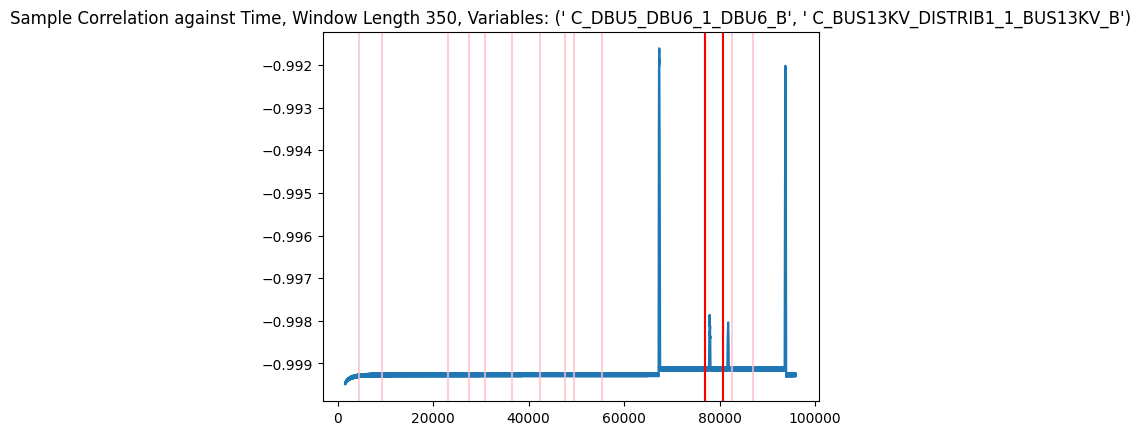

Covariance:


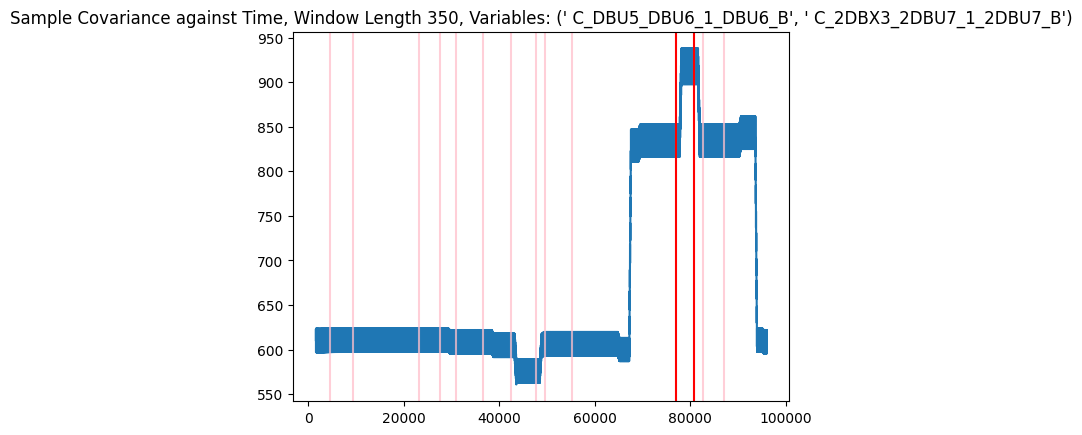

Correlation:


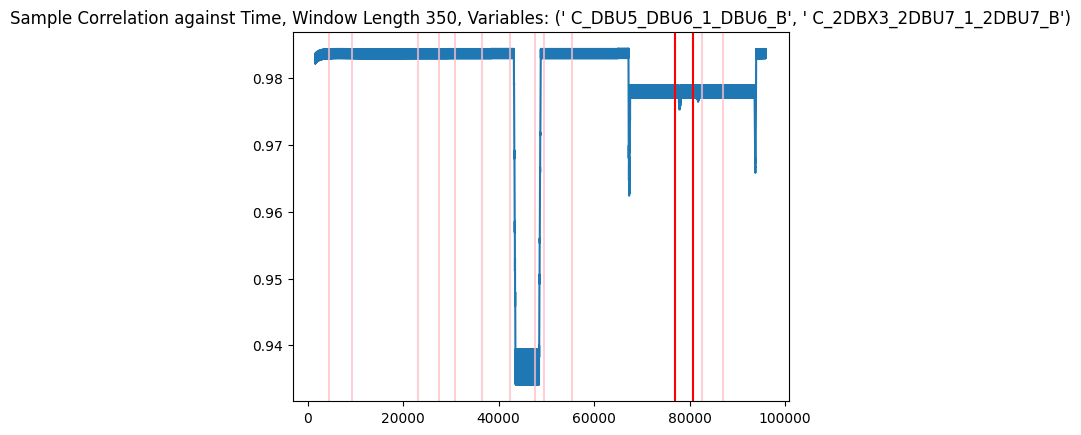

################################################################################################
***********************************************************************************************
Attacked Sensor: C_CT_FDR1_C number:79, Time Attacked: 16.2s to 17.0s
Covariance:


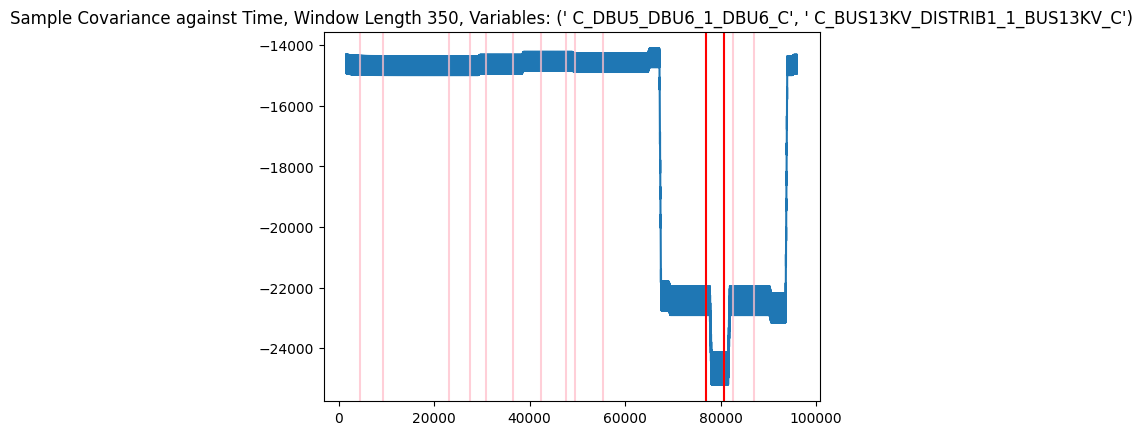

Correlation:


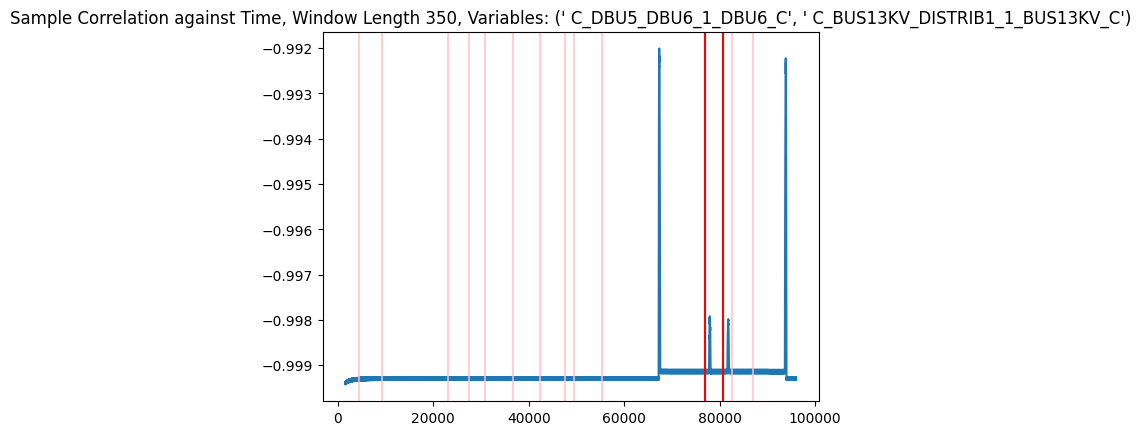

Covariance:


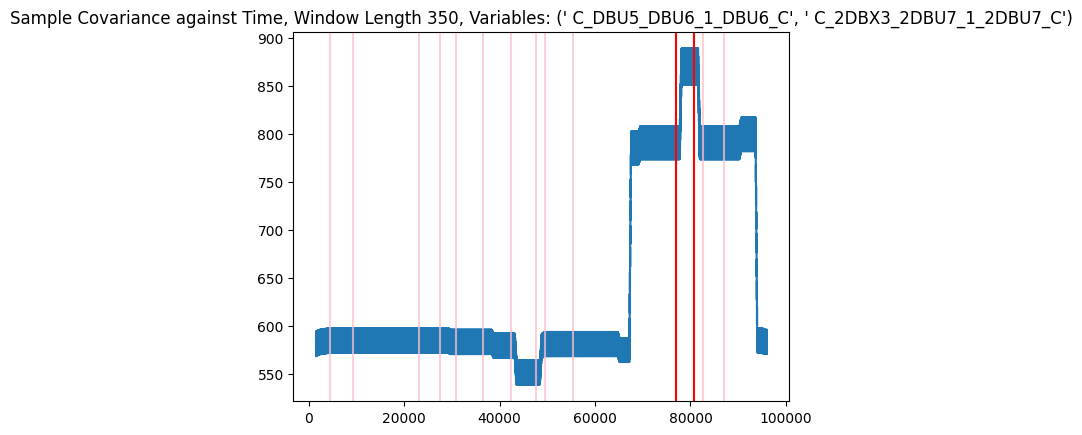

Correlation:


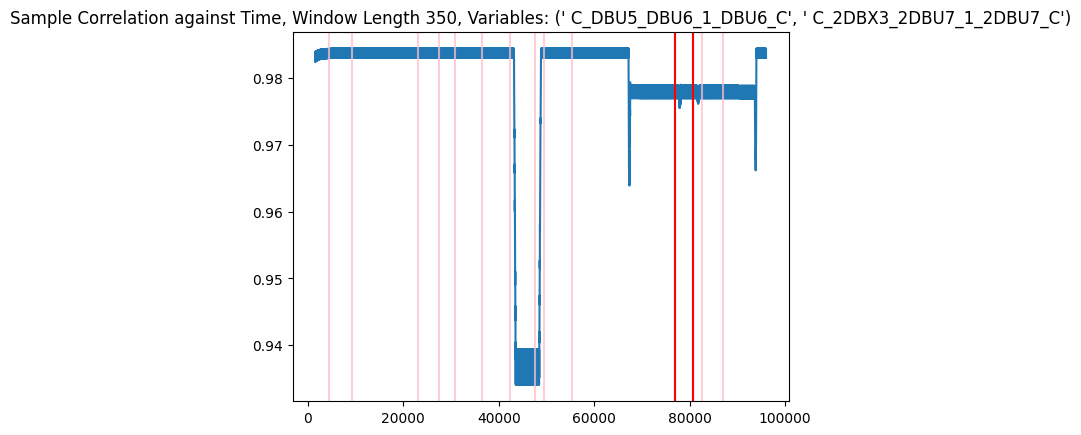

################################################################################################
***********************************************************************************************
Attacked Sensor: V_PT_FDR12_AN number:86, Time Attacked: 17.4s to 18.3s
Covariance:


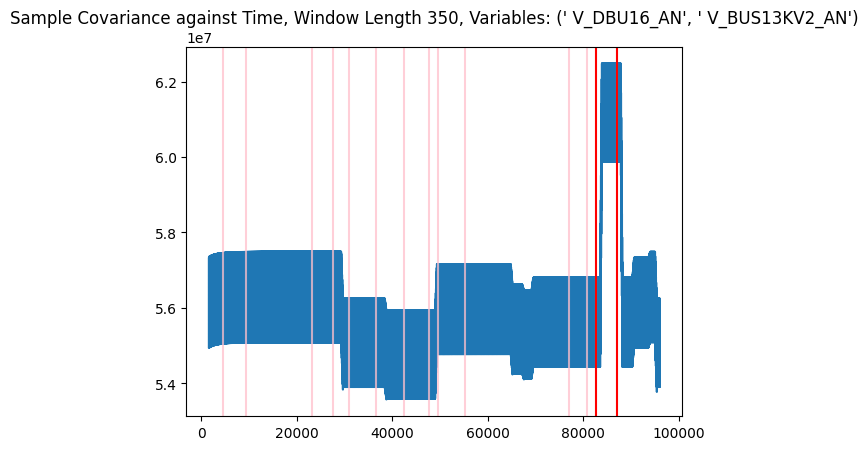

Correlation:


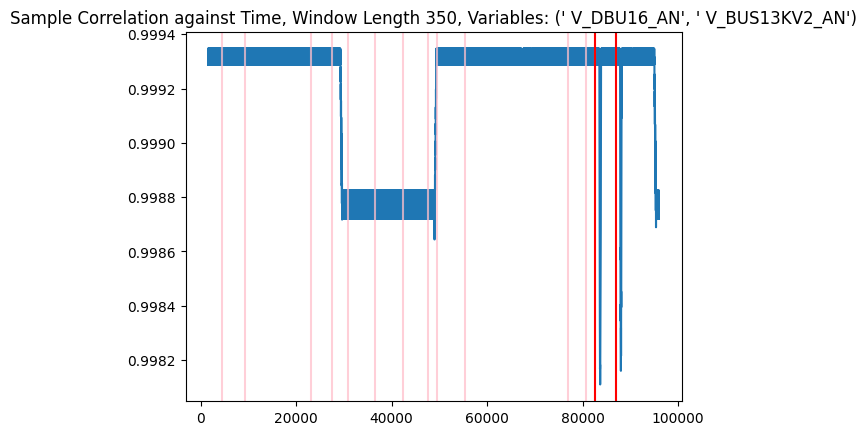

Covariance:


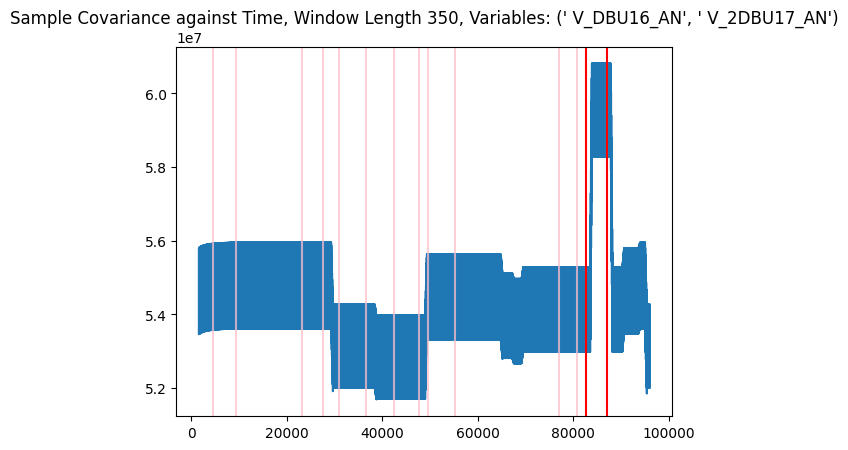

Correlation:


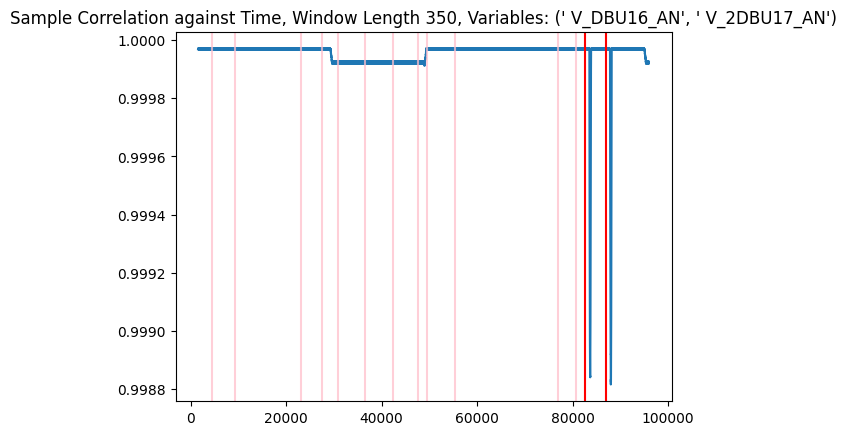

################################################################################################
***********************************************************************************************
Attacked Sensor: V_PT_FDR12_BN number:87, Time Attacked: 17.4s to 18.3s
Covariance:


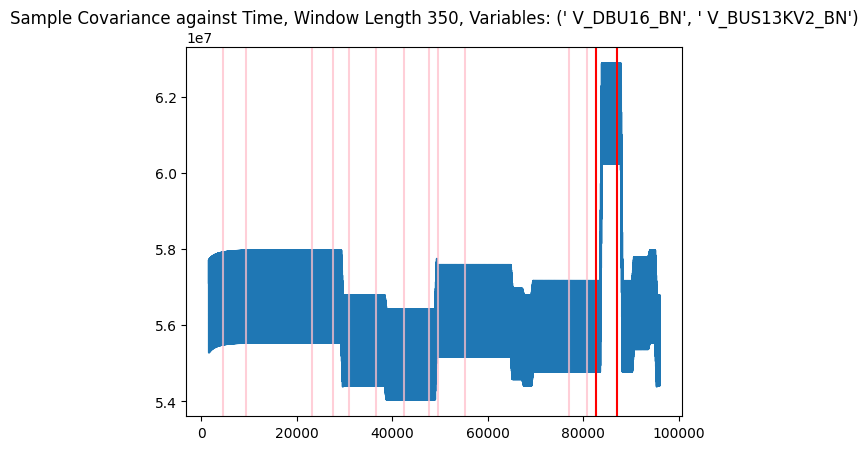

Correlation:


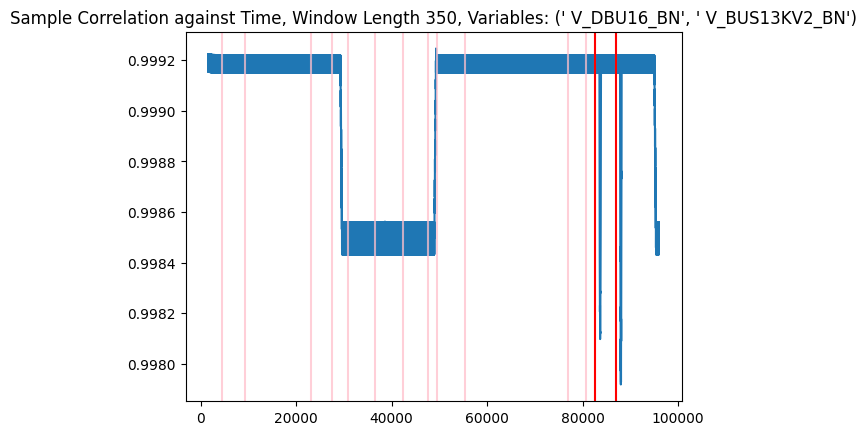

Covariance:


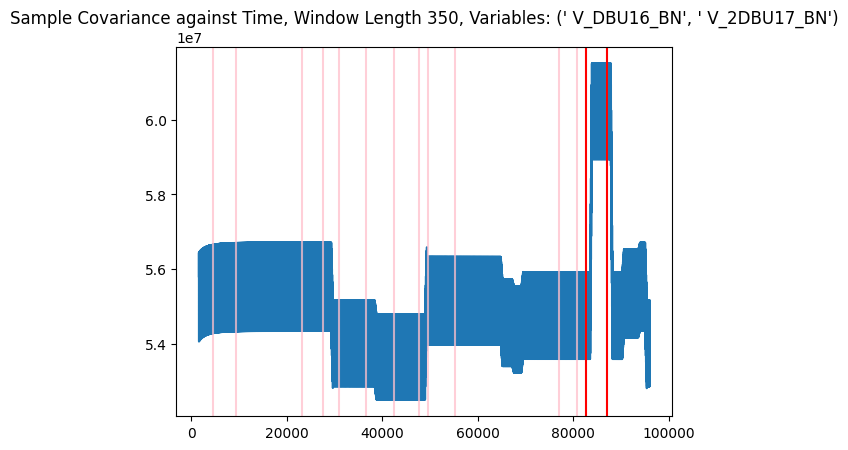

Correlation:


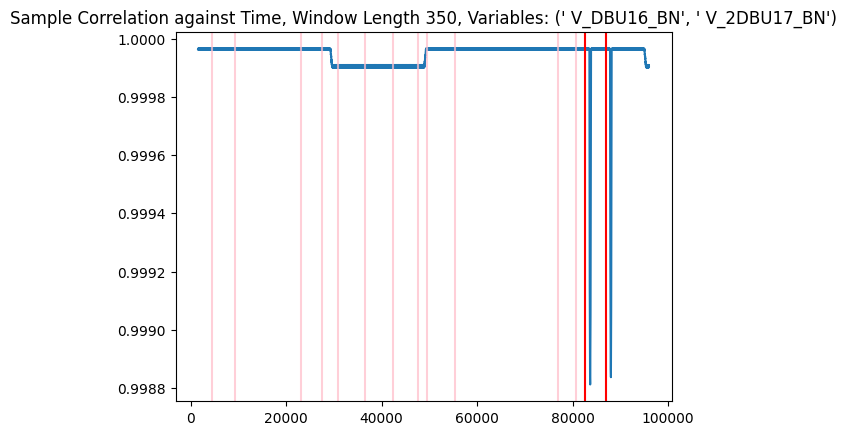

################################################################################################
***********************************************************************************************
Attacked Sensor: V_PT_FDR12_CN number:88, Time Attacked: 17.4s to 18.3s
Covariance:


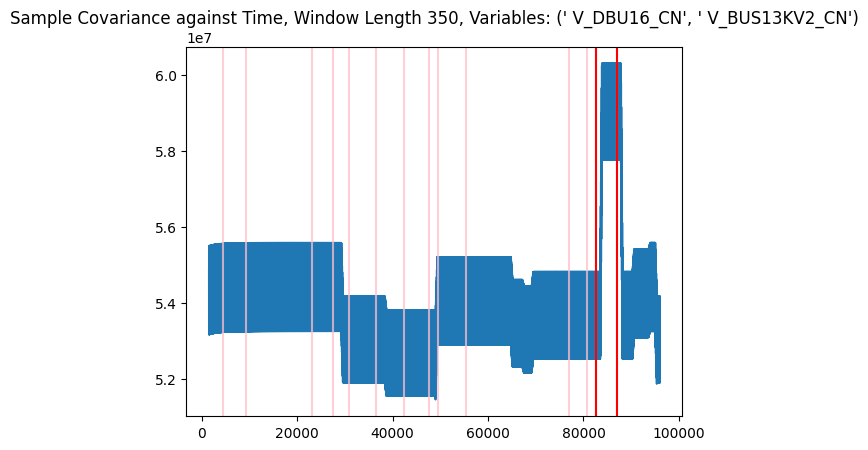

Correlation:


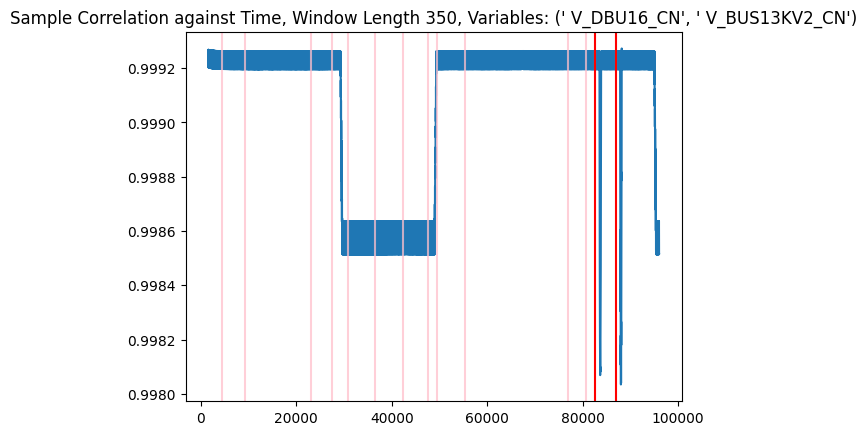

Covariance:


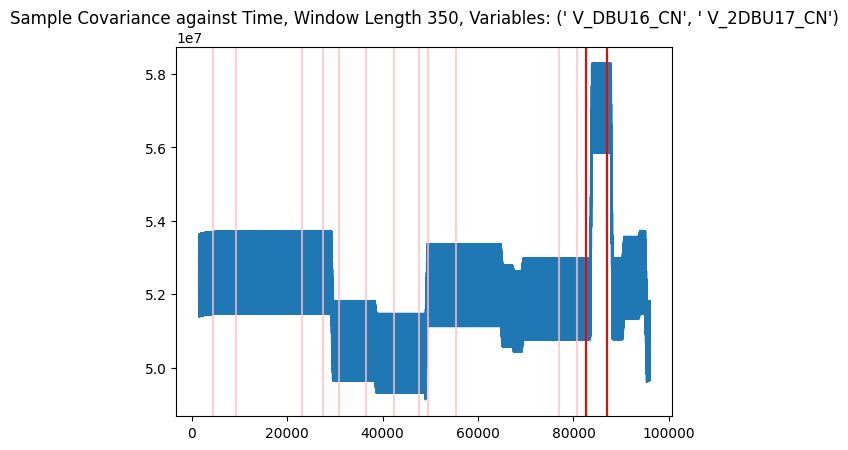

Correlation:


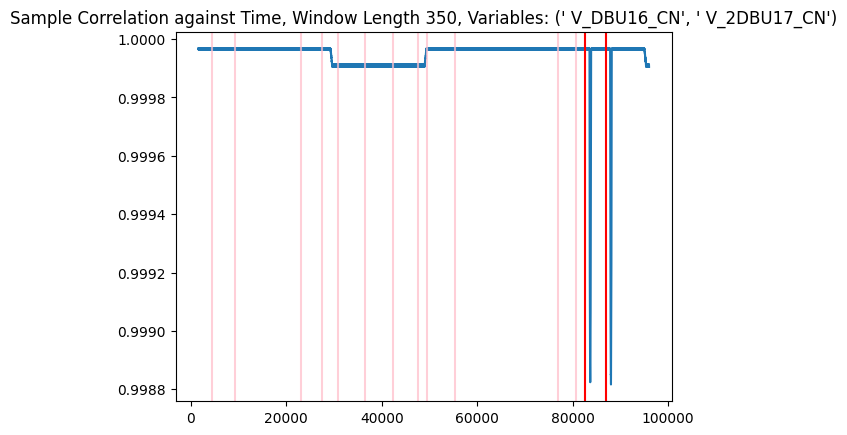

################################################################################################


In [60]:
window = 350
for key, values in attack_dict.items():
    print("***********************************************************************************************")
    print(f"Attacked Sensor: {values[-1]} number:{key}, Time Attacked: {values[0]}s to {values[1]}s")
    attack_indices = df_test.index[
            (df_test['Time'] >= attack_dict[key][0] * 1e6) &
            (df_test['Time'] <= attack_dict[key][1] * 1e6)] - 1201
    try:
        nbrs = adj_list[key]
    except:
        # no neighbours
        assert (key in emptyr)
        print(f"\n{cols[k-1]} has no neighbours\n")
        continue

    for nbr in nbrs:
        print("Covariance:")
        covariance_pair_plot(data, key-1, nbr-1, window=window, freq=False,
                         attack_indices=[(attack_indices[0]+350, attack_indices[-1]+350)],
                         other_attack_indices=[(x+350,y+350) for x,y in all_attack_indices])
        print("Correlation:")
        correlation_pair_plot(data, key-1, nbr-1, window=window, freq=False,
                         attack_indices=[(attack_indices[0]+350, attack_indices[-1]+350)],
                         other_attack_indices=[(x+350,y+350) for x,y in all_attack_indices])


    print("################################################################################################")